#***Toronto Real Estate Analysis Project***




### **Introduction**

There are a lot of reasons rent in Toronto is getting more expensive, and the most obvious reason is simple supply and demand. A lot of people want to live in the city, and landlords know they have a high demand and they can get away with charging crazy prices. In order to avoid paying rent and invest in real property, it would be really awesome if we could predict the sales prices of houses with good accuracy to avoid paying more than what the unit deserves or it could also help owners to list their houses at the right price to sell quickly.

Alternatively, realtors might use this model to apply more accuracy to their listing prices and "comps" when marketing homes.

It would also be great if we can narrow down the features which are the most important in setting the price of a unit. With all this mind, we applied the OSEMIN approach to obtain and analyze the data we had to find some answers.

### **Obtaining Data**

To Obtain the data used in this experiement, an external RETS connector application account was used to connect to the TREB (Toronto Real Estate Board) website and data from each year was filtered out using select parameters. Later all these different years of data were collated into a single file and read using pandas. The final dataframe had approximately 670,000 rows and 42 columns.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The original data file has about 360 features or columns which we don't need here. Hence, specific important features were imported by eliminating redundant and repetitive columns and all 8 files were read in.

In [0]:
#Reading in only specific columns from the csv files
fields = ['MLS#','Address','Approx Age', 'Approx Square Footage', 'Apt/Unit','Unit #', 'Air Conditioning',
          'Style','Area','Laundry Level','Taxes','Heat Source','Balcony','List Price','Listing Entry Date', 'Bedrooms',
          'Bedrooms +','Washrooms','Rooms','Kitchens','Level','Maintenance','Sale/Lease','Sold Date', 'Water Included', 'Closed Date',
          'Community', 'Postal Code', 'Province', 'Exposure', 'Type',
          "Parking Spaces","Total Parking Spaces", "Parking Type", "Street Direction", "Directions/Cross Streets","Original Price",
          "Sold Price","Last Status",'Parking/Drive',"Days On Market",'Remarks For Clients']

#Read in real estate data from drive between the years 2010 to 2017
path1 = "/content/drive/My Drive/IST718_Project/Data/Combined results(2010).csv"
REdf_2010 = pd.read_csv(path1, usecols=fields)
path2 = "/content/drive/My Drive/IST718_Project/Data/Combined results(2011).csv"
REdf_2011 = pd.read_csv(path2, usecols=fields)
path3 = "/content/drive/My Drive/IST718_Project/Data/Combined results(2012).csv"
REdf_2012 = pd.read_csv(path3, usecols=fields)
path4 = "/content/drive/My Drive/IST718_Project/Data/Combined results(2013).csv"
REdf_2013 = pd.read_csv(path4, usecols=fields)
path5 = "/content/drive/My Drive/IST718_Project/Data/Combined results(2014).csv"
REdf_2014 = pd.read_csv(path5, usecols=fields)
path6 = "/content/drive/My Drive/IST718_Project/Data/Combined results(2015).csv"
REdf_2015 = pd.read_csv(path6, usecols=fields)
path7 = "/content/drive/My Drive/IST718_Project/Data/Combined results(2016).csv"
REdf_2016 = pd.read_csv(path7, usecols=fields)
path8 = "/content/drive/My Drive/IST718_Project/Data/Combined results(2017).csv"
REdf_2017 = pd.read_csv(path8, usecols=fields)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (240,252) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (252) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


All eight dataframes were merged into a single dataframe and written into a file so it can be easily read from a single file for our further analysis.

In [0]:
#Merge dataframes by rows
rd_2010_2011 = pd.concat([REdf_2010, REdf_2011], ignore_index=True)
rd_2010_2012 = pd.concat([rd_2010_2011, REdf_2012], ignore_index=True)
rd_2010_2013 = pd.concat([rd_2010_2012, REdf_2013], ignore_index=True)
rd_2010_2014 = pd.concat([rd_2010_2013, REdf_2014], ignore_index=True)
rd_2010_2015 = pd.concat([rd_2010_2014, REdf_2015], ignore_index=True)
rd_2010_2016 = pd.concat([rd_2010_2015, REdf_2016], ignore_index=True)
REdf_2010_2017 = pd.concat([rd_2010_2016, REdf_2017], ignore_index=True)

#export the combined dataset into a csv file
RealAlyze_export_csv = REdf_2010_2017.to_csv (r'/content/drive/My Drive/IST718_Project/Data/RealAlyze_2010to2017.csv', index = None, header=True)

In [0]:
REdf_2010_2017.shape

(678390, 42)

Most of the column names were renamed for easy usage and reading.

In [0]:
#rename column names
REdf_2010_2017 = REdf_2010_2017.rename(columns={'MLS#':'MLNum','Approx Age': 'Age', 'Approx Square Footage': 'SqFootage', 'Apt/Unit':'CompUnitNo',
                                                'Unit #':'UnitNo', 'Bedrooms +':'Den', 'Level':'FloorNo', 'Maintenance':'MainFee',
                                                'Sold Date': 'SoldDate', 'Parking Spaces':'ParkingSpaces', 'Total Parking Spaces':'TotalParkSpaces',
                                                'Parking Type':'ParkingType', 'Street Direction':'StreetDir', 'Directions/Cross Streets':'Dir_CrossStreets',
                                                'Original Price':'OrigPrice', 'Sold Price':'SoldPrice', 'Last Status':'LastStatus', 'Parking/Drive':'ParkingDrive',
                                                'Days On Market':'DaysOnMarket', 'Air Conditioning':'AirCond', 'Laundry Level':'LaundryLevel', 
                                                'Heat Source':'HeatSource', 'List Price':'ListPrice',  'Listing Entry Date':'ListingEntryDate',
                                                'Water Included':'WaterIncl', 'Closed Date':'ClosedDate', 'Postal Code':'PostalCode'})

list(REdf_2010_2017.columns) 

['AirCond',
 'Remarks For Clients',
 'Address',
 'CompUnitNo',
 'Area',
 'Washrooms',
 'Bedrooms',
 'Den',
 'SoldDate',
 'Community',
 'Exposure',
 'Province',
 'Dir_CrossStreets',
 'DaysOnMarket',
 'HeatSource',
 'ListingEntryDate',
 'LaundryLevel',
 'ListPrice',
 'LastStatus',
 'MainFee',
 'MLNum',
 'Kitchens',
 'OrigPrice',
 'ParkingType',
 'ParkingDrive',
 'ParkingSpaces',
 'Balcony',
 'Rooms',
 'Sale/Lease',
 'SoldPrice',
 'SqFootage',
 'StreetDir',
 'FloorNo',
 'Style',
 'Taxes',
 'ClosedDate',
 'TotalParkSpaces',
 'Type',
 'UnitNo',
 'WaterIncl',
 'Age',
 'PostalCode']

### **Scrubbing**

To begin with, there were a lot of inconsistencies with the data which was collected.  For example, there were a few entries outside of Canada which were in the TREB listings which were not part of our analysis, these comprise only about 0.01% of the listings.  So we focused our listings to those situated only in the province of ontario.  Furthermore, our data was divided into two separate data frmaes, one which contains only sales data and the other contianing only lease data.   This seemed like a natural division as our analysis is focused on sales -- lease information would only serve to confuse our model and analysis.  All other basic scrubbing work such as removing punctuation, conversion to appropriate datatypes, checking for null values was also completed.  Correlation testing was completed to eliminate features which had the same meaning or had a high positive correlation -- the total number of features was reduced to 37.  The final dataframe for sold units between the years 2010 to 2017 has abut 240,000 rows and 37 columns.



In [0]:
#filter data only by Ontario province
is_Ont =  REdf_2010_2017['Province']=='Ontario'
REstate_Ont = REdf_2010_2017[is_Ont]
REstate_Ont.shape

(671478, 42)

In [0]:
#Further filter data where listings are for Sale and store it in a separate df
is_Sale =  REstate_Ont['Sale/Lease']=='Sale'
REstate_Ont_Sale = REstate_Ont[is_Sale]
REstate_Ont_Sale.shape


(422511, 42)

In [0]:
#filter by sld status to avoid seeing expired, terminated and suspended listings
is_LastStatus =  REstate_Ont_Sale['LastStatus']=='Sld'
REstate_Ont_Sold = REstate_Ont_Sale[is_LastStatus]
REstate_Ont_Sold.shape

(240677, 42)

In [0]:
#Further filter data where listings are for Lease and store it in a separate df
is_Lease =  REstate_Ont['Sale/Lease']=='Lease'
REstate_Ont_Lease = REstate_Ont[is_Lease]
REstate_Ont_Lease.shape

(248964, 42)

In [0]:
#Sale Data
#convert all text to lowercase to avoid discrepancies
REstate_Ont_Sold = REstate_Ont_Sold.applymap(lambda s:s.lower() if type(s) == str else s)
#strip off trailing whitespaces from all columns in the dataframe
REstate_Ont_Sold = REstate_Ont_Sold.applymap(lambda s:s.strip() if type(s) == str else s)
REstate_Ont_Sold.head()



,AirCond,Remarks For Clients,Address,CompUnitNo,Area,Washrooms,Bedrooms,Den,SoldDate,Community,Exposure,Province,Dir_CrossStreets,DaysOnMarket,HeatSource,ListingEntryDate,LaundryLevel,ListPrice,LastStatus,MainFee,MLNum,Kitchens,OrigPrice,ParkingType,ParkingDrive,ParkingSpaces,Balcony,Rooms,Sale/Lease,SoldPrice,SqFootage,StreetDir,FloorNo,Style,Taxes,ClosedDate,TotalParkSpaces,Type,UnitNo,WaterIncl,Age,PostalCode
14,central air,'malibu' perfect for first time buyer or inves...,600 fleet st,504,toronto,1.0,1.0,1.0,1/6/2010 0:00,niagara,e,ontario,lakeshore/bathurst st.,158.0,gas,8/1/2009 0:00,NaN,319000.0,sld,320.46,c1677165,1.0,299000.0,none,undergrnd,0.0,open,5.0,sale,290000.0,500-699,NaN,5,apartment,0.0,2/1/2010 0:00,NaN,c.,4,y,0-5,m5v1b7
16,central air,rare 3 storey 5 bedroom harbour sq penthouse. ...,65 harbour sq,ph7,toronto,4.0,5.0,NaN,1/15/2010 0:00,waterfront communities c1,e,ontario,bay/queens quay,155.0,electric,8/13/2009 0:00,upper,1449000.0,sld,1780.00,c1684466,1.0,1499999.0,exclusive,undergrnd,2.0,open,9.0,sale,1395000.0,3500-5000,NaN,38,3-storey,10500.0,3/1/2010 0:00,NaN,c.,7,y,NaN,m5j2l4
41,central air,approx 1416sf with 174sf open terrace & balcon...,16 yonge st,ph7,toronto,3.0,3.0,NaN,1/14/2010 0:00,waterfront communities c1,sw,ontario,yonge/lake shore,119.0,gas,9/18/2009 0:00,NaN,799900.0,sld,0.00,c1706859,1.0,799900.0,none,none,0.0,open,6.0,sale,807400.0,1300-1499,NaN,40,apartment,0.0,3/31/2010 0:00,NaN,c.,7,y,new,m5e1r4
54,central air,"yonge & lake shore,new downtown 2 bedroom - 2 ...",18 harbour st,1602,toronto,2.0,2.0,1.0,1/27/2010 0:00,waterfront communities c1,nw,ontario,yonge & lake shore,117.0,gas,10/2/2009 0:00,NaN,497000.0,sld,440.63,c1715732,1.0,497000.0,owned,undergrnd,1.0,open,4.0,sale,492000.0,900-1099,NaN,16,apartment,0.0,4/1/2010 0:00,NaN,c.,2,y,new,m5j2z6
71,NaN,in most sought north york building a beautiful...,1338 york mills rd,1601,toronto,2.0,3.0,NaN,1/31/2010 0:00,parkwoods-donalda,se,ontario,vic park/401,115.0,gas,10/8/2009 0:00,main,220000.0,sld,613.84,c1720379,1.0,220000.0,owned,undergrnd,1.0,open,6.0,sale,210000.0,NaN,NaN,15,apartment,1620.0,3/26/2010 0:00,NaN,c.,1,y,NaN,m3a3m3


In [0]:
#check the number of null values by each column
REstate_Ont_Sold.isnull().sum()

AirCond                  5119
Remarks For Clients       699
Address                     1
CompUnitNo              15354
Area                       74
Washrooms                   1
Bedrooms                  160
Den                    155454
SoldDate                    0
Community                1710
Exposure                 1992
Province                    0
Dir_CrossStreets           29
DaysOnMarket                4
HeatSource                159
ListingEntryDate            0
LaundryLevel            95709
ListPrice                   1
LastStatus                  0
MainFee                     1
MLNum                       0
Kitchens                  163
OrigPrice                   0
ParkingType              1842
ParkingDrive             1843
ParkingSpaces            1843
Balcony                  1989
Rooms                     155
Sale/Lease                  0
SoldPrice                   3
SqFootage               22423
StreetDir              204119
FloorNo                  2023
Style     

In [0]:
#Since about 75% of the data is null for streetdir column, we are dropping this column
RE_Ont_S_Upd = REstate_Ont_Sold.drop(['StreetDir'], axis=1)
#Since about 75% of the data is null for TotalParkSpaces column, we are dropping this column
RE_Ont_S_Upd = RE_Ont_S_Upd.drop(['TotalParkSpaces'], axis=1)
#dropping off remarks column since this needs text mining later
RE_Ont_S_Upd = RE_Ont_S_Upd.drop(['Remarks For Clients'], axis=1)
#drop community column to avoid redundancy or correlation with area column
RE_Ont_S_Upd = RE_Ont_S_Upd.drop(['Community'], axis=1)
#dropping unitNo to avoid redundancy with apt\unitno column and also because of inconsistent values
RE_Ont_S_Upd = RE_Ont_S_Upd.drop(['UnitNo'], axis=1)
#Since Sold Price is our response variable that we are going to predict and hence it doesn't make sense to have
#rows of data that has this information missing, we are dropping rows without this value.
RE_Ont_S_Final = RE_Ont_S_Upd[RE_Ont_S_Upd.SoldPrice.notnull()]
#not having an address for a listing also doesn't help with our analysis; hence removing rows without addresses
RE_Ont_S_Final = RE_Ont_S_Final[RE_Ont_S_Final.Address.notnull()]
RE_Ont_S_Final.shape

(240673, 37)

In [0]:
#Replacement of null values
RE_Ont_S_Final['Washrooms'].fillna(0, inplace=True)
RE_Ont_S_Final['Den'].fillna(0, inplace=True)
RE_Ont_S_Final['Bedrooms'].fillna(0, inplace=True)
RE_Ont_S_Final['Kitchens'].fillna(0, inplace=True)
RE_Ont_S_Final['DaysOnMarket'].fillna(0, inplace=True)
RE_Ont_S_Final['MainFee'].fillna(0, inplace=True)
RE_Ont_S_Final['ParkingSpaces'].fillna(0, inplace=True)
RE_Ont_S_Final['FloorNo'].fillna(0, inplace=True)
RE_Ont_S_Final['Taxes'].fillna(0, inplace=True)
RE_Ont_S_Final['ListPrice'].fillna(0, inplace=True)
RE_Ont_S_Final['MainFee'].fillna(0, inplace=True)
RE_Ont_S_Final['AirCond'].fillna("unknown", inplace=True)
RE_Ont_S_Final['Area'].fillna("unknown", inplace=True)
RE_Ont_S_Final['CompUnitNo'].fillna("unknown", inplace=True)
RE_Ont_S_Final['Exposure'].fillna("unknown", inplace=True)
RE_Ont_S_Final['Dir_CrossStreets'].fillna("unknown", inplace=True)
RE_Ont_S_Final['HeatSource'].fillna("unknown", inplace=True)
RE_Ont_S_Final['LaundryLevel'].fillna("unknown", inplace=True)
RE_Ont_S_Final['ParkingType'].fillna("unknown", inplace=True)
RE_Ont_S_Final['ParkingDrive'].fillna("unknown", inplace=True)
RE_Ont_S_Final['Balcony'].fillna("unknown", inplace=True)
RE_Ont_S_Final['FloorNo'].fillna("unknown", inplace=True)
RE_Ont_S_Final['Style'].fillna("unknown", inplace=True)
RE_Ont_S_Final['WaterIncl'].fillna("unknown", inplace=True)

In [0]:
#check the number of null values by each column
RE_Ont_S_Final.isnull().sum()

AirCond                  0
Address                  0
CompUnitNo               0
Area                     0
Washrooms                0
Bedrooms                 0
Den                      0
SoldDate                 0
Exposure                 0
Province                 0
Dir_CrossStreets         0
DaysOnMarket             0
HeatSource               0
ListingEntryDate         0
LaundryLevel             0
ListPrice                0
LastStatus               0
MainFee                  0
MLNum                    0
Kitchens                 0
OrigPrice                0
ParkingType              0
ParkingDrive             0
ParkingSpaces            0
Balcony                  0
Rooms                  155
Sale/Lease               0
SoldPrice                0
SqFootage            22423
FloorNo                  0
Style                    0
Taxes                    0
ClosedDate            1831
Type                     0
WaterIncl                0
Age                 135192
PostalCode              74
d

In [0]:
#find the datatypes of existing columns
RE_Ont_S_Final.dtypes

AirCond              object
Address              object
CompUnitNo           object
Area                 object
Washrooms           float64
Bedrooms            float64
Den                 float64
SoldDate             object
Exposure             object
Province             object
Dir_CrossStreets     object
DaysOnMarket        float64
HeatSource           object
ListingEntryDate     object
LaundryLevel         object
ListPrice           float64
LastStatus           object
MainFee             float64
MLNum                object
Kitchens            float64
OrigPrice           float64
ParkingType          object
ParkingDrive         object
ParkingSpaces       float64
Balcony              object
Rooms               float64
Sale/Lease           object
SoldPrice           float64
SqFootage            object
FloorNo              object
Style                object
Taxes               float64
ClosedDate           object
Type                 object
WaterIncl            object
Age                 

In [0]:
# using apply method to convert some of the columns to numeric datatype so that calculations can be done
RE_Ont_S_Final[['Washrooms', 'Den','Bedrooms','Kitchens', 'DaysOnMarket','ListPrice','MainFee','OrigPrice','ParkingSpaces','Rooms','SoldPrice','Taxes']] = RE_Ont_S_Final[['Washrooms', 'Den', 'Bedrooms','Kitchens','DaysOnMarket','ListPrice','MainFee','OrigPrice','ParkingSpaces','Rooms','SoldPrice','Taxes']].apply(pd.to_numeric)

RE_Ont_S_Final[['AirCond','Address','CompUnitNo','Area','Exposure','Province','Dir_CrossStreets','HeatSource','LaundryLevel','LastStatus','MLNum','ParkingType',
               'ParkingDrive','Balcony','Sale/Lease','SqFootage','FloorNo','Style','WaterIncl','Age','PostalCode','Type']] = RE_Ont_S_Final[['AirCond','Address','CompUnitNo','Area',
                                                                                                                                    'Exposure','Province','Dir_CrossStreets',
                                                                                                                                    'HeatSource','LaundryLevel','LastStatus','MLNum',
                                                                                                                                    'ParkingType','ParkingDrive','Balcony','Sale/Lease',
                                                                                                                                    'SqFootage','FloorNo','Style','WaterIncl','Age',
                                                                                                                                    'PostalCode','Type']].astype(str)

In [0]:
#remap age values to avoid discrepancy
age = {"0-5": "zero to five", "16-30": "sixteen to thirty","31-50":"thirtyone to fifty", "51-99":"fiftyone to nintyNine", "100+":"more than 100",
        "new":"new", "10-jun":"six to ten", "15-nov":"eleven to fifteen","15-jun":"six to fifteen", "61-50":"fifty to sixty one", "nan":"unknown"}
RE_Ont_S_Final["Age"].replace(age, inplace=True)

RE_Ont_S_Final.Age.unique()

array(['zero to five', 'unknown', 'new', 'six to fifteen',
       'thirtyone to fifty', 'sixteen to thirty', 'six to ten',
       'fiftyone to nintyNine', 'more than 100', 'eleven to fifteen',
       'fifty to sixty one'], dtype=object)

In [0]:
#replacing values in Sqfootage column to avoid discrepancies
RE_Ont_S_Final['SqFootage'] = RE_Ont_S_Final['SqFootage'].replace(['< 700'], 'less than 700')
RE_Ont_S_Final['SqFootage'] = RE_Ont_S_Final['SqFootage'].replace(['5000+'], '5000 plus')
RE_Ont_S_Final['SqFootage'] = RE_Ont_S_Final['SqFootage'].replace(['nan'], 'unknown')
RE_Ont_S_Final.SqFootage.unique()

array(['500-699', '3500-5000', '1300-1499', '900-1099', 'unknown',
       '700-899', '1100-1299', '0-499', '2000-2500', '1500-2000',
       '1000-1199', '1200-1399', '500-599', '900-999', '3000-3500',
       '800-899', '2500-3000', '1600-1799', '600-699', '700-799',
       '1800-1999', '1400-1599', '5000 plus', '3000-3249', '2250-2499',
       '2000-2249', '700-1100', '4250-4499', '2500-2749', '2750-2999',
       '3250-3499', '3500-3749', '3750-3999', '4500-4749', '4000-4249',
       '4750-4999', '1100-1500', 'less than 700'], dtype=object)

In [0]:
# replacing values in postal code
RE_Ont_S_Final['PostalCode'] = RE_Ont_S_Final['PostalCode'].replace(['tba'], 'unknown')
RE_Ont_S_Final['PostalCode'] =  RE_Ont_S_Final['PostalCode'].replace(['xxxxxx'], 'unknown')
RE_Ont_S_Final['PostalCode'] =  RE_Ont_S_Final['PostalCode'].replace([' '], '')
RE_Ont_S_Final.PostalCode.unique()

array(['m5v1b7', 'm5j2l4', 'm5e1r4', ..., 'm8y1w3', 'l1n0c1', 'l4m7c2'],
      dtype=object)

In [0]:
#convert date columns to datetime datatype and fill null values with year 1900 for identification
RE_Ont_S_Final['SoldDate'] = pd.to_datetime(RE_Ont_S_Final['SoldDate'], errors='coerce').fillna('1900-01-01')
RE_Ont_S_Final['ClosedDate'] = pd.to_datetime(RE_Ont_S_Final['ClosedDate'], errors='coerce').fillna('1900-01-01')

In [0]:
#Make new Year, Month and Day columns from the SoldDate column
RE_Ont_S_Final['SoldYear'] = pd.DatetimeIndex(RE_Ont_S_Final['SoldDate']).year
RE_Ont_S_Final['SoldMonth'] = pd.DatetimeIndex(RE_Ont_S_Final['SoldDate']).month
RE_Ont_S_Final['SoldDay'] = pd.DatetimeIndex(RE_Ont_S_Final['SoldDate']).day

In [0]:
##remap type values to avoid discrepancy
#replace periods with nothing
RE_Ont_S_Final['Type'] = RE_Ont_S_Final['Type'].str.replace(".","")
listingType = {'2': 'comm element condo', 'c': 'condo apartment', 't':'condo townhouse', 'e':'co-op apt', 'w':'co-ownership apt', 'o':'other', '@':'parking space',
               'h':'det condo', '3':'leasehold condo', '9':'locker','7':'lower level', '8':'room', 'p':'semi-det condo', 'z':'time share', '~':'upper level',
               '5':'vacant land condo', 'a6':'locker','a7':'locker', '4':'phased condo'}
RE_Ont_S_Final["Type"].replace(listingType, inplace=True)

RE_Ont_S_Final.Type.unique()

array(['condo apartment', 'condo townhouse', 'co-ownership apt',
       'comm element condo', 'semi-det condo', 'det condo',
       'leasehold condo', 'co-op apt', 'other', 'vacant land condo',
       'phased condo', 'parking space', 'locker', 'time share'],
      dtype=object)

In [0]:
#removing special characters from strings using regex

RE_Ont_S_Final['Dir_CrossStreets'] = RE_Ont_S_Final['Dir_CrossStreets'].map(lambda x: re.sub(r'\W+', '', x))
RE_Ont_S_Final['Address'] = RE_Ont_S_Final['Address'].map(lambda x: re.sub(r'\W+', '', x))
#RE_Ont_S_Final['FloorNo'] = RE_Ont_S_Final['FloorNo'].map(lambda x: re.sub(r'\W+', '', x))

RE_Ont_S_Final.FloorNo.unique()

array(['5', '38', '40', '16', '15', '14', '1', '42', '13', '6', '43', '8',
       '44', '25', '4', '26', '3', '7', '33', '10', '11', '22', '2', '9',
       '23', '20', '32', '21', '35', '53', '12', '18', '19', '29', '31',
       '17', '30', '24', '34', '27', 'b', '28', 'g', '0', 'c', '36', 'u',
       '39', '52', 'p4', '46', 'i', '45', 'gph', 'ph', 'a', '48', '/',
       '37', '47', '41', '3&4', '`', 'one', 'p3', 'ph8', '50', 'p1',
       'upp', '55', 'l', 'gr', 'gnd', 'uph', '2nd', 'd', 'p2', '1st',
       '5&6', 'll', 'a 2', '.', 'lph', 'grd', 'pb', 'n', '223', 'm',
       'ter', 'ph5', 'b2', 'rl', 'gt', '1/l', 'up', 'th', '-', 'o', 'ph3',
       '14t', '60', 'u/g', '1&2', 'sph', '49', '67', 'z', '51', '', '209',
       '682', '70', 'ycc', 'two', '409', 'f', '65', 'x', 'ph1', '908',
       '229', 'p5', 'c1', '507', 'a#3', '268', 'lp', '---', 'gd', 'ph2',
       '--', 'p', 'fla', 'pcc', '7c', '200', '*', '13a', '54', '57',
       '110', 'r l', '62', 'vip', '112', 'l1', 'low', '91', '1

In [0]:
## replacing values in Parking Type
RE_Ont_S_Final['ParkingType'] = RE_Ont_S_Final['ParkingType'].replace(['u'], 'underground')
RE_Ont_S_Final.ParkingType.unique()

array(['none', 'exclusive', 'owned', 'rental', 'common', 'unknown',
       'stacked', 'compact', 'underground'], dtype=object)

In [0]:
## dropping parking drive column isnce information is redundant with parking type
RE_Ont_S_Final = RE_Ont_S_Final.drop(['ParkingDrive'], axis=1)

In [0]:
#create a new column to show the total number of rooms by adding washroom, bedroom and den and compare it with the original rooms column. If rooms column value is less than the rooms_new column, replace
#otherwise leave it as it is -- this is to make sure all the null values are replaced and any inconsistencies are taken care of.

RE_Ont_S_Final['Rooms'] = RE_Ont_S_Final['Bedrooms'] + RE_Ont_S_Final['Den'] + RE_Ont_S_Final['Washrooms'] + RE_Ont_S_Final['Kitchens']

#RE_Ont_S_Final.loc[RE_Ont_S_Final['Rooms'] < RE_Ont_S_Final['Rooms_New'], 'Rooms'] = RE_Ont_S_Final['Rooms_New']
#RE_Ont_S_Final = RE_Ont_S_Final.drop(['Rooms_New'], axis=1)
RE_Ont_S_Final.head()

,AirCond,Address,CompUnitNo,Area,Washrooms,Bedrooms,Den,SoldDate,Exposure,Province,Dir_CrossStreets,DaysOnMarket,HeatSource,ListingEntryDate,LaundryLevel,ListPrice,LastStatus,MainFee,MLNum,Kitchens,OrigPrice,ParkingType,ParkingSpaces,Balcony,Rooms,Sale/Lease,SoldPrice,SqFootage,FloorNo,Style,Taxes,ClosedDate,Type,WaterIncl,Age,PostalCode,SoldYear,SoldMonth,SoldDay
14,central air,600fleetst,504,toronto,1.0,1.0,1.0,2010-01-06,e,ontario,lakeshorebathurstst,158.0,gas,8/1/2009 0:00,unknown,319000.0,sld,320.46,c1677165,1.0,299000.0,none,0.0,open,4.0,sale,290000.0,500-699,5,apartment,0.0,2010-02-01 00:00:00,condo apartment,y,zero to five,m5v1b7,2010,1,6
16,central air,65harboursq,ph7,toronto,4.0,5.0,0.0,2010-01-15,e,ontario,bayqueensquay,155.0,electric,8/13/2009 0:00,upper,1449000.0,sld,1780.00,c1684466,1.0,1499999.0,exclusive,2.0,open,10.0,sale,1395000.0,3500-5000,38,3-storey,10500.0,2010-03-01 00:00:00,condo apartment,y,unknown,m5j2l4,2010,1,15
41,central air,16yongest,ph7,toronto,3.0,3.0,0.0,2010-01-14,sw,ontario,yongelakeshore,119.0,gas,9/18/2009 0:00,unknown,799900.0,sld,0.00,c1706859,1.0,799900.0,none,0.0,open,7.0,sale,807400.0,1300-1499,40,apartment,0.0,2010-03-31 00:00:00,condo apartment,y,new,m5e1r4,2010,1,14
54,central air,18harbourst,1602,toronto,2.0,2.0,1.0,2010-01-27,nw,ontario,yongelakeshore,117.0,gas,10/2/2009 0:00,unknown,497000.0,sld,440.63,c1715732,1.0,497000.0,owned,1.0,open,6.0,sale,492000.0,900-1099,16,apartment,0.0,2010-04-01 00:00:00,condo apartment,y,new,m5j2z6,2010,1,27
71,unknown,1338yorkmillsrd,1601,toronto,2.0,3.0,0.0,2010-01-31,se,ontario,vicpark401,115.0,gas,10/8/2009 0:00,main,220000.0,sld,613.84,c1720379,1.0,220000.0,owned,1.0,open,6.0,sale,210000.0,unknown,15,apartment,1620.0,2010-03-26 00:00:00,condo apartment,y,unknown,m3a3m3,2010,1,31


In [0]:
#Write this final cleaned and pre-processed dataframe into a csv file
RE_Final_S = RE_Ont_S_Final.to_csv (r'/content/drive/My Drive/IST718_Project/Data/RealAlyze_2010to2017_PostCleaning.csv', index = None, header=True)

**Exploratory Data Analysis**

We begin by reading in the cleaned and prepared dataset and view some high-level descriptive statistics from the metric variables.

In [0]:
#Read in the clean file
path_F = "/content/drive/My Drive/IST718_Project/Data/RealAlyze_2010to2017_PostCleaning.csv"
RE_Final_S = pd.read_csv(path_F)

In [0]:
RE_Final_S.describe()

,Washrooms,Bedrooms,Den,DaysOnMarket,ListPrice,MainFee,Kitchens,OrigPrice,ParkingSpaces,Rooms,SoldPrice,Taxes,SoldYear,SoldMonth,SoldDay
count,240673.000000,240673.000000,240673.000000,240673.000000,2.406730e+05,240673.000000,240673.000000,2.406730e+05,240673.000000,240673.000000,2.406730e+05,240673.000000,240673.000000,240673.000000,240673.000000
mean,1.789561,1.913401,0.358906,29.107133,3.709021e+05,481.448808,1.000777,3.878523e+05,1.717584,5.062645,3.680340e+05,2206.592578,2013.485480,6.135611,15.827006
std,0.731878,0.815282,0.498098,32.614795,2.232186e+05,348.716330,0.072208,2.314434e+06,24.532421,1.451257,2.202943e+05,3802.393036,2.210689,3.173675,8.704325
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,2010.000000,1.000000,1.000000
25%,1.000000,1.000000,0.000000,10.000000,2.598000e+05,330.000000,1.000000,2.599000e+05,1.000000,4.000000,2.550000e+05,1610.000000,2012.000000,4.000000,8.000000
50%,2.000000,2.000000,0.000000,20.000000,3.300000e+05,443.880000,1.000000,3.349000e+05,1.000000,5.000000,3.290000e+05,2097.590000,2014.000000,6.000000,16.000000
75%,2.000000,2.000000,1.000000,38.000000,4.250000e+05,592.270000,1.000000,4.288000e+05,1.000000,6.000000,4.250000e+05,2626.500000,2015.000000,9.000000,23.000000
max,10.000000,9.000000,7.000000,3720.000000,1.200000e+07,62745.000000,7.000000,8.150000e+08,5187.000000,31.000000,1.200000e+07,533864.000000,2017.000000,12.000000,31.000000


[Text(0, 0, 'condo apartment'),
 Text(0, 0, 'condo townhouse'),
 Text(0, 0, 'comm element condo'),
 Text(0, 0, 'co-op apt'),
 Text(0, 0, 'det condo'),
 Text(0, 0, 'semi-det condo'),
 Text(0, 0, 'co-ownership apt'),
 Text(0, 0, 'parking space'),
 Text(0, 0, 'other'),
 Text(0, 0, 'leasehold condo'),
 Text(0, 0, 'locker'),
 Text(0, 0, 'vacant land condo'),
 Text(0, 0, 'phased condo'),
 Text(0, 0, 'time share')]

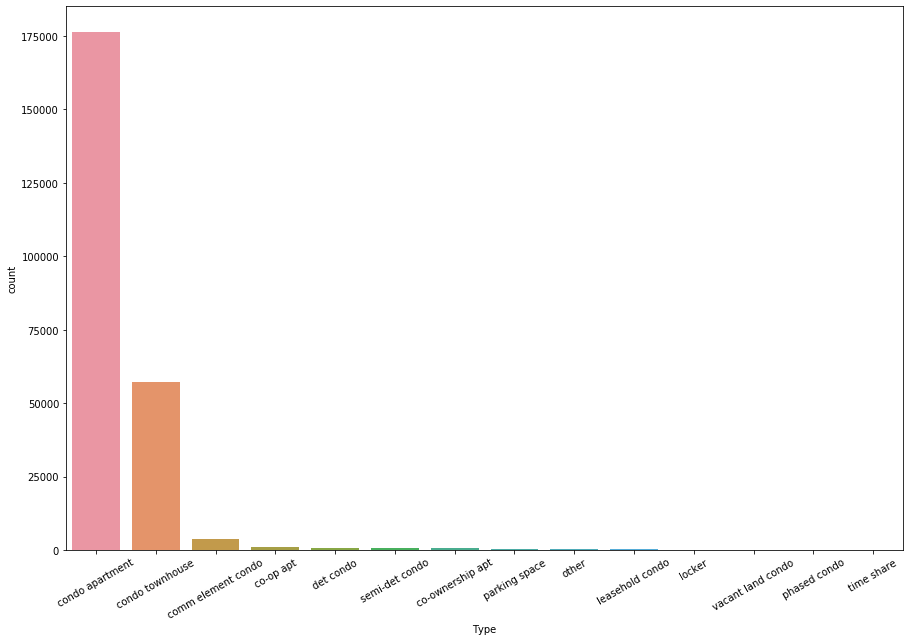

In [0]:
#let's do some exploratory data analysis

plt.figure(figsize = (15, 10))
g = sns.countplot(x= 'Type', data = RE_Final_S, order = RE_Final_S['Type'].value_counts().index)
loc,labels = plt.xticks()
g.set_xticklabels(labels, rotation=30)

The above plot shows condo apartments are the highest number of listings in our dataset for sale followed by condo townhouses.

[Text(0, 0, 'unknown'),
 Text(0, 0, 'zero to five'),
 Text(0, 0, 'sixteen to thirty'),
 Text(0, 0, 'new'),
 Text(0, 0, 'six to ten'),
 Text(0, 0, 'thirtyone to fifty'),
 Text(0, 0, 'eleven to fifteen'),
 Text(0, 0, 'six to fifteen'),
 Text(0, 0, 'fiftyone to nintyNine'),
 Text(0, 0, 'more than 100'),
 Text(0, 0, 'fifty to sixty one')]

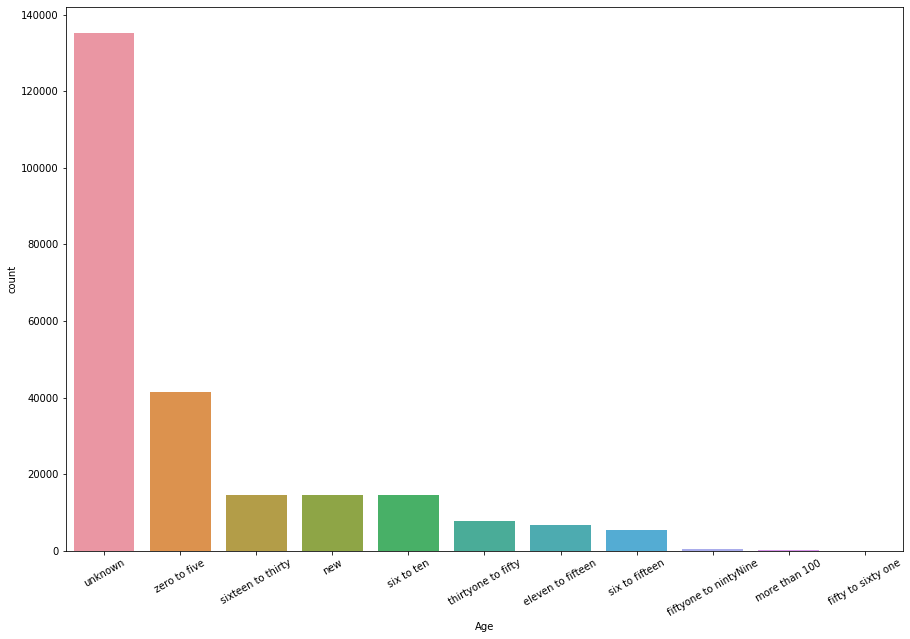

In [0]:
#summarize age of buildings
plt.figure(figsize = (15, 10))
g2 = sns.countplot(x= 'Age', data = RE_Final_S, order = RE_Final_S['Age'].value_counts().index)
loc,labels2 = plt.xticks()
g2.set_xticklabels(labels2, rotation=30)

As expected, our dataset is clean though the meta data within still has some elements which prove to skew our data and analysis.  The "age" of many of the buildings within our dataset is unknown and would require considerable effort to correct.  Furthermore, since we're using data collected and available through the Toronto Real Estate Board and we want to update this model from the same data source, we must proceed by ignoring the "unknown" values in the "age" variable.  The number of buildings listed in the database with a high count are new buildings with ages ranging from 0 to five years.

[Text(0, 0, 'owned'),
 Text(0, 0, 'exclusive'),
 Text(0, 0, 'none'),
 Text(0, 0, 'common'),
 Text(0, 0, 'rental'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'stacked'),
 Text(0, 0, 'compact'),
 Text(0, 0, 'underground')]

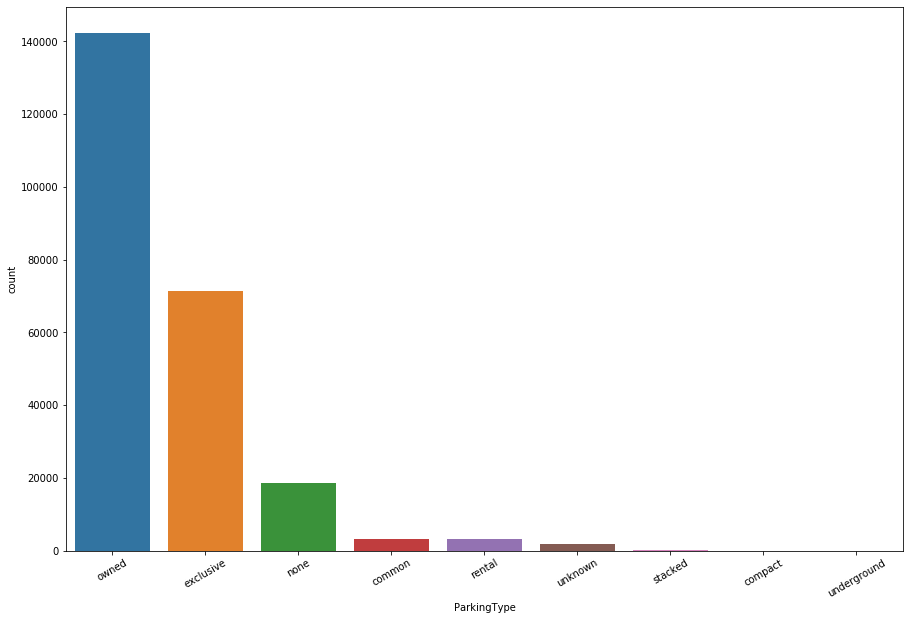

In [0]:
#summarize Parking Space Type for listings
plt.figure(figsize = (15, 10))
g3 = sns.countplot(x= 'ParkingType', data = RE_Final_S, order = RE_Final_S['ParkingType'].value_counts().index)
loc,labels3 = plt.xticks()
g3.set_xticklabels(labels3, rotation=30)

In this plot we can see the  majority of the listings for sale have their own parking spaces instead of being rented or common for all -- an attractive feature.

[Text(0, 0, '1000-1199'),
 Text(0, 0, '1200-1399'),
 Text(0, 0, '600-699'),
 Text(0, 0, 'unknown'),
 Text(0, 0, '700-799'),
 Text(0, 0, '900-999'),
 Text(0, 0, '800-899'),
 Text(0, 0, '1400-1599'),
 Text(0, 0, '500-599'),
 Text(0, 0, '1600-1799'),
 Text(0, 0, '700-899'),
 Text(0, 0, '0-499'),
 Text(0, 0, '900-1099'),
 Text(0, 0, '500-699'),
 Text(0, 0, '1100-1299'),
 Text(0, 0, '1800-1999'),
 Text(0, 0, '1500-2000'),
 Text(0, 0, '1300-1499'),
 Text(0, 0, '2000-2249'),
 Text(0, 0, '2250-2499'),
 Text(0, 0, '2000-2500'),
 Text(0, 0, '2500-2749'),
 Text(0, 0, '2750-2999'),
 Text(0, 0, '2500-3000'),
 Text(0, 0, '3000-3249'),
 Text(0, 0, '3250-3499'),
 Text(0, 0, '3500-3749'),
 Text(0, 0, '3000-3500'),
 Text(0, 0, '1100-1500'),
 Text(0, 0, '5000 plus'),
 Text(0, 0, '4000-4249'),
 Text(0, 0, '3500-5000'),
 Text(0, 0, '4250-4499'),
 Text(0, 0, '700-1100'),
 Text(0, 0, '3750-3999'),
 Text(0, 0, '4500-4749'),
 Text(0, 0, '4750-4999'),
 Text(0, 0, 'less than 700')]

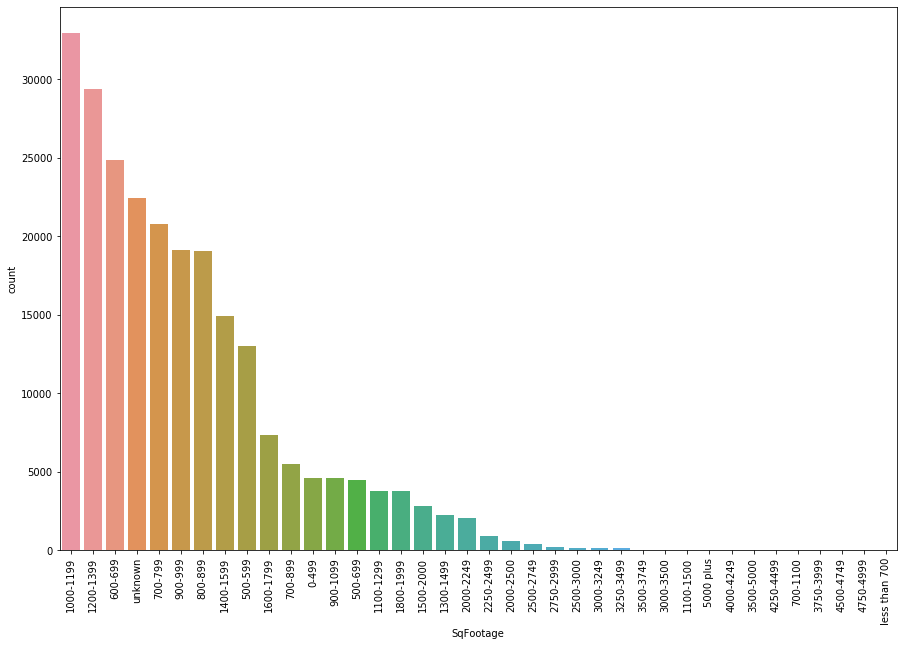

In [0]:
#summarize Square footage area of buildings
plt.figure(figsize = (15, 10))
g4 = sns.countplot(x= 'SqFootage', data = RE_Final_S, order = RE_Final_S['SqFootage'].value_counts().index)
loc,labels4 = plt.xticks()
g4.set_xticklabels(labels4, rotation=90)

The precise square footage data is contained within the "notes" section of the TREB data.  We are working with a categorical variable "SqFootage" instead.  There are about 32000 listings in the market with a "SqFootage" area of 1100 - 1200 sq ft.  Between the $20,000 to $30,000 range, these are the most common SqFootage values: 1200-1399, 600-699 and 700-799. Listings with less than 700 sqft are extremely rare as indicated on the far right in the plot above. 

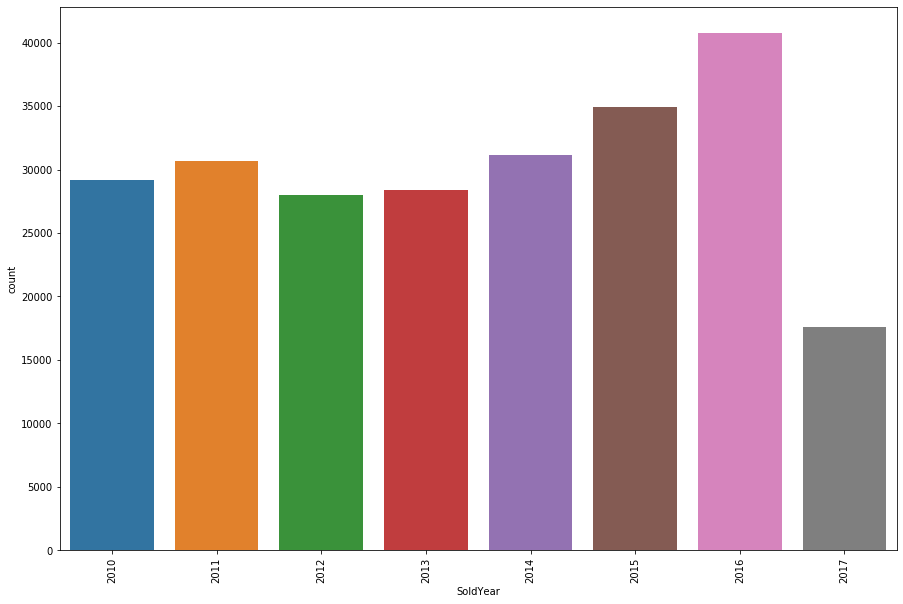

In [0]:
#summarize Yearly building sale
plt.figure(figsize = (15, 10))
ax = sns.countplot(x= 'SoldYear', data = RE_Final_S)
for item in ax.get_xticklabels():
    item.set_rotation(90)


Apart from 2017 data, as it's incomplete, there is a noticeable upward trend in  the number of listings on sale from 2012 to 2016. There is a brief spike in  2011 but picks up thereafter.

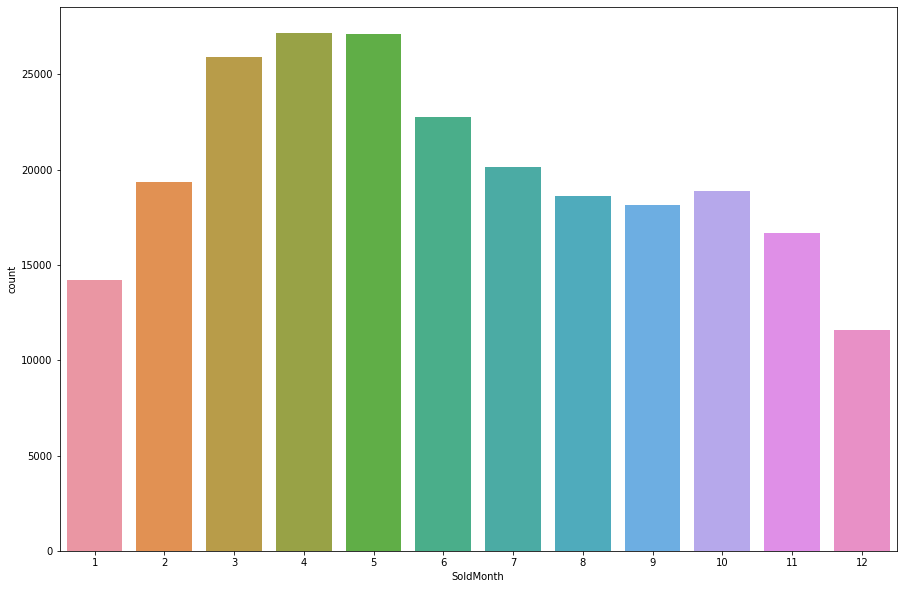

In [0]:
#summarize Monthly Listing sale
plt.figure(figsize = (15, 10))
ax2 = sns.countplot(x= 'SoldMonth', data = RE_Final_S)


Most listings are sold between March and May; while the least number of sales occur in Dec and Jan.  The incomplete data from 2017 may play a factor in these numbers, but should not drastically affect the outcome of our analysis.

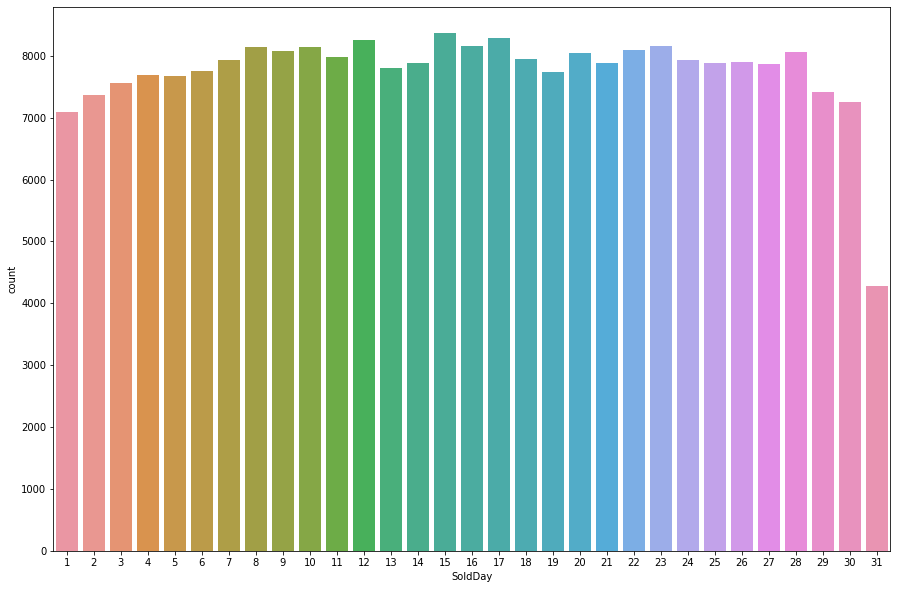

In [0]:
#summarize Monthly Listing sale
plt.figure(figsize = (15, 10))
ax3 = sns.countplot(x= 'SoldDay', data = RE_Final_S)

While no pattern presents in looking at the sales by each day of the month, there is an exceptional dip on the month end.  There are only 39 business days in our dataset which fall on the 31st day of a month.  

In [0]:
RE_Final_S.dtypes

AirCond              object
Address              object
CompUnitNo           object
Area                 object
Washrooms           float64
Bedrooms            float64
Den                 float64
SoldDate             object
Exposure             object
Province             object
Dir_CrossStreets     object
DaysOnMarket        float64
HeatSource           object
ListingEntryDate     object
LaundryLevel         object
ListPrice           float64
LastStatus           object
MainFee             float64
MLNum                object
Kitchens            float64
OrigPrice           float64
ParkingType          object
ParkingSpaces       float64
Balcony              object
Rooms               float64
Sale/Lease           object
SoldPrice           float64
SqFootage            object
FloorNo              object
Style                object
Taxes               float64
ClosedDate           object
Type                 object
WaterIncl            object
Age                  object
PostalCode          

**House Prediction using Keras Model**

Load the necessary libraries

In [0]:
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model

Using TensorFlow backend.


In [0]:
RE_Final_S = RE_Final_S.drop(['AirCond','Address','CompUnitNo','Area','Den','SoldDate','Exposure','Province','Dir_CrossStreets','HeatSource','ListingEntryDate','LaundryLevel','LastStatus','MLNum','ParkingType','Balcony','Sale/Lease','SqFootage','FloorNo','Style','ClosedDate','Type','WaterIncl','Age','PostalCode','SoldYear','SoldMonth','SoldDay'], axis=1)
RE_Final_S.dtypes

Washrooms        float64
Bedrooms         float64
DaysOnMarket     float64
ListPrice        float64
MainFee          float64
Kitchens         float64
OrigPrice        float64
ParkingSpaces    float64
Rooms            float64
SoldPrice        float64
Taxes            float64
dtype: object

Data has already been loaded and date transformed into the correct format

Split data for training

In [0]:
def train_validate_test_split(RE_Final_S, train_part=.6, validate_part=.2, test_part=.2, seed=None):
    np.random.seed(seed)
    total_size = train_part + validate_part + test_part
    train_percent = train_part / total_size
    validate_percent = validate_part / total_size
    test_percent = test_part / total_size
    perm = np.random.permutation(RE_Final_S.index)
    m = len(RE_Final_S)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = perm[:train_end]
    validate = perm[train_end:validate_end]
    test = perm[validate_end:]
    return train, validate, test

Split index ranges into three different parts

In [0]:
train_size, valid_size, test_size = (70, 30, 0)
toronto_train, toronto_valid, toronto_test = train_validate_test_split(RE_Final_S, 
                              train_part=train_size, 
                              validate_part=valid_size,
                              test_part=test_size,
                              seed=2017)

Extract data for training and also validation (x and y vectors)

In [0]:
toronto_y_train = RE_Final_S.loc[toronto_train, ['SoldPrice']]
toronto_x_train = RE_Final_S.loc[toronto_train, :].drop('SoldPrice', axis=1)
toronto_y_valid = RE_Final_S.loc[toronto_valid, ['SoldPrice']]
toronto_x_valid = RE_Final_S.loc[toronto_valid, :].drop('SoldPrice', axis=1)

Training dataset is twice as large as the validation dataset

In [0]:
print('Size of training set: ', len(toronto_x_train))
print('Size of validation set: ', len(toronto_x_valid))
print('Size of test set: ', len(toronto_test), '(not converted)')

Size of training set:  168471
Size of validation set:  72201
Size of test set:  1 (not converted)


Function to conduct statistics 

In [0]:
def norm_stats(df1, df2):
    dfs = df1.append(df2)
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)

In [0]:
def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

Normalize the training and the validation variables which predict the price

In [0]:
stats = norm_stats(toronto_x_train, toronto_x_valid)
arr_x_train = np.array(z_score(toronto_x_train, stats))
arr_y_train = np.array(toronto_y_train)
arr_x_valid = np.array(z_score(toronto_x_valid, stats))
arr_y_valid = np.array(toronto_y_valid)

In [0]:
print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (168471, 10)
Training samples:  168471
Validation samples:  72201


Initialize three Keras models 

In [0]:
def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)

In [0]:
def basic_model_2(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)

In [0]:
def basic_model_3(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(80, activation="tanh", kernel_initializer='normal', input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(120, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(20, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1_l2(0.01), bias_regularizer=regularizers.l1_l2(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(10, activation="relu", kernel_initializer='normal'))
    t_model.add(Dropout(0.0))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer='nadam',
        metrics=[metrics.mae])
    return(t_model)

Create the Keras model

In [0]:
model = basic_model_3(arr_x_train.shape[1], arr_y_train.shape[1])
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                880       
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               9720      
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                2420      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         

Fit the Keras model

In [0]:


epochs = 500
batch_size = 128

print('Epochs: ', epochs)
print('Batch size: ', batch_size)



Epochs:  500
Batch size:  128


In [0]:
keras_callbacks = [
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=2)
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}.hdf5', monitor='val_loss', save_best_only=True, verbose=0)
    # TensorBoard(log_dir='/tmp/keras_logs/model_3', histogram_freq=0, write_graph=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None),
    EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=0)
]

Fit the model

In [0]:
history = model.fit(arr_x_train, arr_y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=0, # Change it to 2, if wished to observe execution
    validation_data=(arr_x_valid, arr_y_valid),
    callbacks=keras_callbacks)

In [0]:
train_score = model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  12633.9455 , Train Loss:  928414228.5042
Val MAE:  12924.5073 , Val Loss:  1519942653.4387


Function to plot the training history

In [0]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_absolute_error'])
    plt.plot(h['val_mean_absolute_error'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return

Plot the training history

Training error after 500 epochs versus training error for the last batch after model improvement

The difference between the "ground truth" and predicted house prices (e.g., mean absolute error) is approximately 10K

The loss function helped to improve the performance of the model

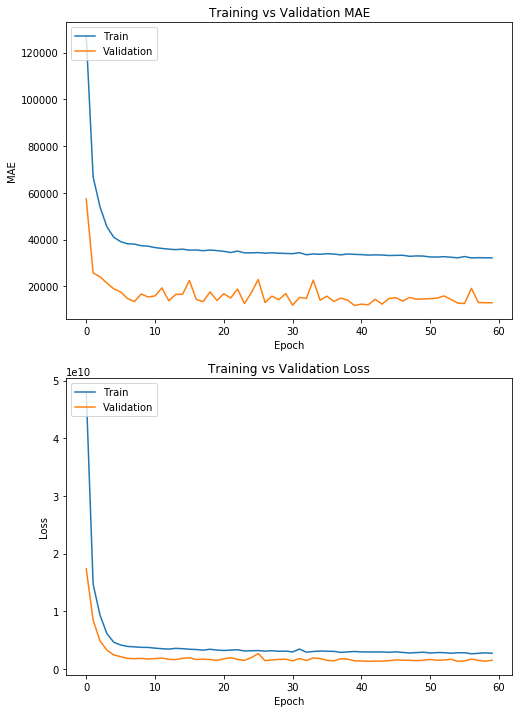

In [0]:
plot_hist(history.history, xsize=8, ysize=12)

**House Prediction Using Time Series Model**

In [0]:
#Read in the clean file
path_F = "/content/drive/My Drive/IST718_Project/Data/RealAlyze_2010to2017_PostCleaning.csv"
RE_Final_S = pd.read_csv(path_F)

#Read in postal code details
path_C = "/content/drive/My Drive/IST718_Project/Data/ca_postal_codes.csv"
postal_cd_data = pd.read_csv(path_C)
postal_cd_data = postal_cd_data.rename(columns={'Postal Code':'PostalCode_3'})
postal_cd_data['PostalCode_3'] = postal_cd_data['PostalCode_3'].str.lower()

# Append additional details to postal codes
RE_Final_S['PostalCode_3'] = RE_Final_S['PostalCode'].str.slice(0,3)
RE_Final_S = RE_Final_S.merge(postal_cd_data,on='PostalCode_3')
RE_Final_S.head()

,AirCond,Address,CompUnitNo,Area,Washrooms,Bedrooms,Den,SoldDate,Exposure,Province_x,Dir_CrossStreets,DaysOnMarket,HeatSource,ListingEntryDate,LaundryLevel,ListPrice,LastStatus,MainFee,MLNum,Kitchens,OrigPrice,ParkingType,ParkingSpaces,Balcony,Rooms,Sale/Lease,SoldPrice,SqFootage,FloorNo,Style,Taxes,ClosedDate,Type,WaterIncl,Age,PostalCode,SoldYear,SoldMonth,SoldDay,PostalCode_3,Place Name,Province_y,Latitude,Longitude,Unnamed: 5,Unnamed: 6
0,central air,600fleetst,504,toronto,1.0,1.0,1.0,2010-01-06,e,ontario,lakeshorebathurstst,158.0,gas,8/1/2009 0:00,unknown,319000.0,sld,320.46,c1677165,1.0,299000.0,none,0.0,open,4.0,sale,290000.0,500-699,5,apartment,0.00,2010-02-01 00:00:00,condo apartment,y,zero to five,m5v1b7,2010,1,6,m5v,Downtown Toronto (CN Tower / King and Spadina ...,ON,43.6404,-79.3995,NaN,NaN
1,central air,55bremnerblvd,2109,toronto,1.0,1.0,0.0,2010-01-28,e,ontario,yorkbremner,108.0,gas,10/14/2009 0:00,unknown,376900.0,sld,270.00,c1722935,1.0,376900.0,owned,0.0,open,3.0,sale,409400.0,unknown,14,apartment,0.00,2010-05-17 00:00:00,condo apartment,y,new,m5v0a1,2010,1,28,m5v,Downtown Toronto (CN Tower / King and Spadina ...,ON,43.6404,-79.3995,NaN,NaN
2,central air,250wellingtonstw,132,toronto,1.0,1.0,0.0,2010-01-08,s,ontario,johnwellington,86.0,gas,10/14/2009 0:00,unknown,429900.0,sld,453.27,c1723605,1.0,429900.0,owned,1.0,terr,3.0,sale,401000.0,700-899,1,apartment,2425.44,2010-03-26 00:00:00,condo apartment,y,zero to five,m5v3p6,2010,1,8,m5v,Downtown Toronto (CN Tower / King and Spadina ...,ON,43.6404,-79.3995,NaN,NaN
3,central air,11brunelcrt,4809,toronto,1.0,1.0,0.0,2010-01-07,e,ontario,spadinaandfrontqew,70.0,gas,10/29/2009 0:00,main,279000.0,sld,218.88,c1732970,1.0,298000.0,none,0.0,none,3.0,sale,258000.0,unknown,42,apartment,0.00,2010-02-26 00:00:00,condo apartment,y,zero to five,m5v3y3,2010,1,7,m5v,Downtown Toronto (CN Tower / King and Spadina ...,ON,43.6404,-79.3995,NaN,NaN
4,central air,36bluejaysway,1307,toronto,2.0,1.0,1.0,2010-01-17,e,ontario,wellingtonbluejays,80.0,gas,10/29/2009 0:00,unknown,379000.0,sld,651.19,c1733027,1.0,379000.0,none,0.0,none,5.0,sale,365000.0,900-1099,13,apartment,2767.35,2010-02-01 00:00:00,condo apartment,y,unknown,m5v3t3,2010,1,17,m5v,Downtown Toronto (CN Tower / King and Spadina ...,ON,43.6404,-79.3995,NaN,NaN


In [0]:
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime
import warnings
from statsmodels.tsa.ar_model import AR
import matplotlib.ticker as ticker

With the limited number of home sales in a given zip code each month, the data is summarized at a 3 digit zip code and quarterly level to provide a more stable data set to analyze.  Temporal and spatial data require aggregation at some level prior to analysis which will certainly introduce some intrinsic variability.

In [0]:
# Prepare data for time series analysis

# Remove any Postal Codes that are not 6 characters
RE_ts_data = RE_Final_S[RE_Final_S['PostalCode'].str.len()==6]

#Remove any invalid zip codes
RE_ts_data = RE_ts_data[~RE_ts_data['PostalCode'].isin(['******','------','.0.0.0'])]

# Add a column that represents the quarter in which the home was sold
RE_ts_data['SoldQtr'] = pd.to_datetime(RE_ts_data['SoldDate']).dt.quarter

# Group the zip codes by year and month and calculate the average
RE_ts_data = RE_ts_data.groupby(by=['PostalCode_3','SoldYear','SoldQtr'],as_index=False)[['SoldPrice']].mean()

# Combine the year and month into one column
RE_ts_data['Yr-Qtr'] = RE_ts_data['SoldYear'].astype(str) + '-Q' + RE_ts_data['SoldQtr'].astype(str)

RE_ts_data.head()

,PostalCode_3,SoldYear,SoldQtr,SoldPrice,Yr-Qtr
0,a1a,2011,2,379000.0,2011-Q2
1,h2n,2015,1,575000.0,2015-Q1
2,h2n,2016,1,598000.0,2016-Q1
3,h3n,2010,3,125000.0,2010-Q3
4,j5m,2012,1,220000.0,2012-Q1


The graphs below show a managable and tighter range of values for each quarter, providing some stability for modeling. Additionally the charts below show a relatively steady increase in the sales prices with a more significant spike in the most recent two quarters

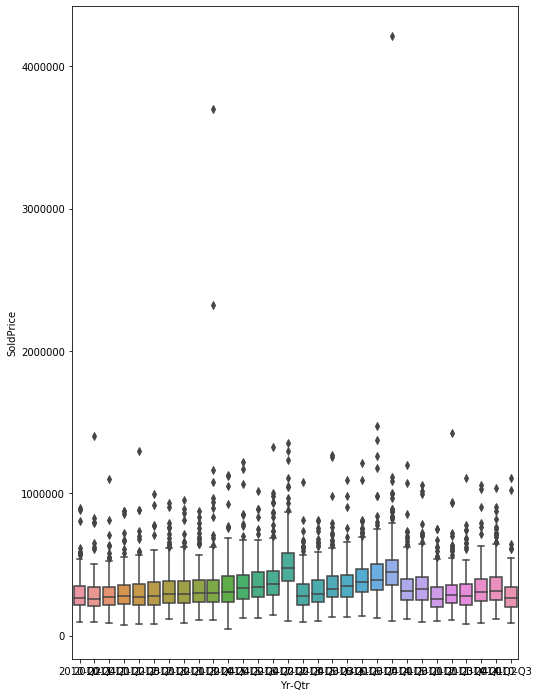

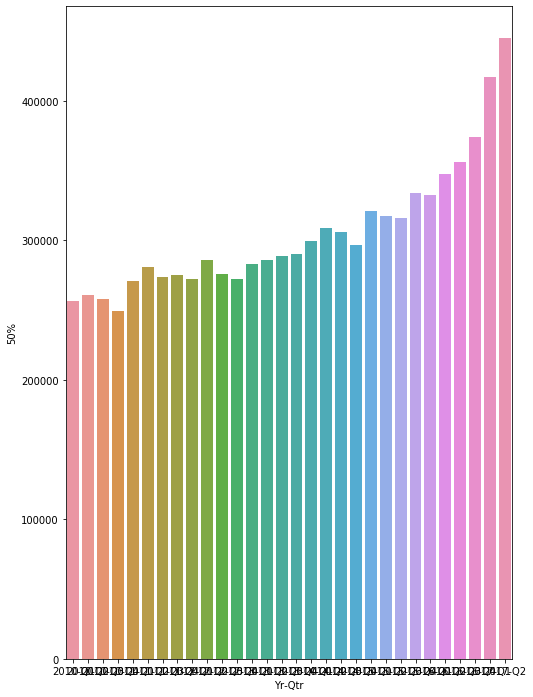

In [0]:
# List of zips with at least 12 Quarters of data
RE_temp = RE_ts_data.groupby(by='PostalCode_3').count()
valid_zips = RE_temp[RE_temp['SoldPrice']>=12].index.values

# Data Views Over Time
sns.boxplot(x='Yr-Qtr',y='SoldPrice',data=RE_ts_data[RE_ts_data['PostalCode_3'].isin(valid_zips)])

loc,labels3 = plt.xticks()
ax.set_xticklabels(labels3, rotation=30)

RE_yr_qtr_agg = RE_ts_data.groupby('Yr-Qtr').describe()['SoldPrice']
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
sns.barplot(x=RE_yr_qtr_agg.index,y='50%',data=RE_yr_qtr_agg)

plt.show()

The Autocorrelation plot shows some relationship between prior quarters and the next quarter providing some evidence the future quarters can be forecast based on historical results.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:409: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


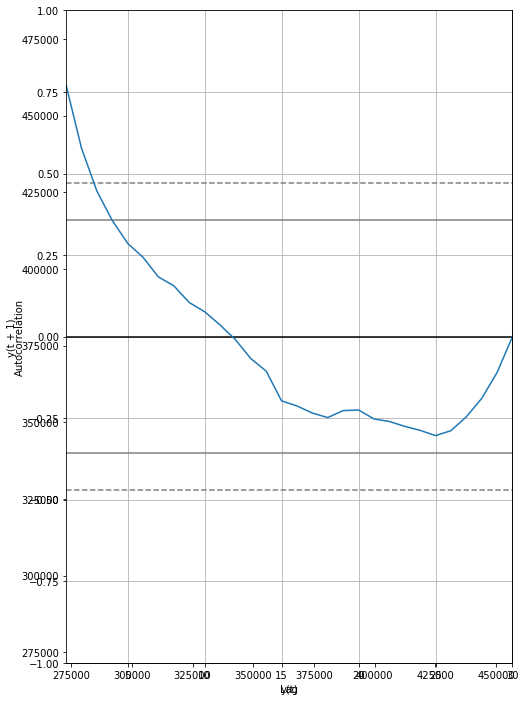

In [0]:
# Correlation analysis of time periods for all data
RE_ts_mean = RE_ts_data[['Yr-Qtr','SoldPrice']].groupby('Yr-Qtr').mean()
lag_plot(RE_ts_mean)
pd.concat((RE_ts_mean.shift(1),RE_ts_mean),axis=1).corr()

# Autocorrelation Plot
autocorrelation_plot(RE_ts_mean)

In [0]:
# Functions to run models and return MAE
def AR_Model(zip_cd):
  sold_price = RE_ts_data[RE_ts_data['PostalCode_3']==zip_cd]
  pre_2017_values = sold_price[sold_price['SoldYear'] != 2017]['SoldPrice']
  sold_price_2017 = sold_price[sold_price['SoldYear'] == 2017]['SoldPrice']
  try:
    AR_Model = AR(pre_2017_values)
    AR_fit = AR_Model.fit()
    predictions = AR_fit.predict(start=len(pre_2017_values), end=len(pre_2017_values)+1, dynamic=False)
    AR_Error = mean_absolute_error(sold_price_2017, predictions)
  except:
    AR_Error = -1
  return AR_Error, predictions, zip_cd

def SARIMA_Model(zip_cd):
  sold_price = RE_ts_data[RE_ts_data['PostalCode_3']==zip_cd]
  pre_2017_values = sold_price[sold_price['SoldYear'] != 2017]['SoldPrice']
  sold_price_2017 = sold_price[sold_price['SoldYear'] == 2017]['SoldPrice']    # SARIMA Model & Prediction
  try:
    sarima_model = SARIMAX(pre_2017_values)
    sarima_model_fit = sarima_model.fit(disp=False)
    yhat = sarima_model_fit.forecast(2)
    SARIMA_Error = mean_absolute_error(yhat,sold_price_2017)
  except:
    SARIMA_Error = -1
    
  return SARIMA_Error, yhat, zip_cd

In [0]:
# Run Autoregression Model
from multiprocessing import Pool, cpu_count
warnings.filterwarnings('ignore')
start_time = datetime.datetime.now()
p = Pool(cpu_count())
ar_preds = list(p.imap(AR_Model,valid_zips))
p.close()
p.join()
print(datetime.datetime.now()-start_time)

AR_Preds_df = pd.DataFrame(ar_preds, columns=['error','predictions','postal_cd_3'])

0:00:00.792408


In [0]:
# Run Seasonal Autoregression Model
warnings.filterwarnings('ignore')
start_time = datetime.datetime.now()
p = Pool(cpu_count())
SARIMA_MAE = list(p.imap(SARIMA_Model,valid_zips))
p.close()
p.join()
print(datetime.datetime.now()-start_time)

SARIMA_Preds_df = pd.DataFrame(SARIMA_MAE, columns=['error', 'yhat','postal_cd_3'])

0:00:02.702570


Running the ARIMA model and the Seasonal ARIMA model we get a wide range of error for both models.  The SARIMA significantly outperforms the ARIMA model mostly due to fewer outliers.  Looking at the charts below we can see the ARIMA and SARIMA have similar medians for the errors but the ARIMA missed some forecasts significantly.

error_AR        548119.258643
error_SARIMA    104009.979134
dtype: float64


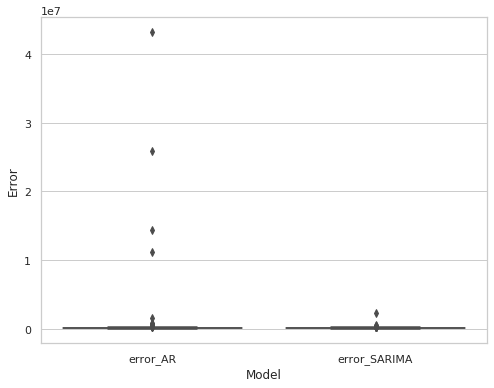

In [0]:
# Compare Errors by model
Error_compare_df = AR_Preds_df.merge(SARIMA_Preds_df,on='postal_cd_3',suffixes=('_AR','_SARIMA'))
Error_compare_df = Error_compare_df[(Error_compare_df['error_AR'] != -1) & (Error_compare_df['error_SARIMA'] != -1)]
Error_compare_df = Error_compare_df.rename(columns = {'postal_cd_3':'PostalCode_3'})
Error_compare_df = Error_compare_df.merge(postal_cd_data,on='PostalCode_3')

# Average Errors by Model
print(Error_compare_df[['error_AR', 'error_SARIMA']].mean())

# Boxplot of errors by model
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.boxplot(x='Model',y='Error',data=pd.melt(Error_compare_df[['error_AR','error_SARIMA']],value_vars=['error_AR','error_SARIMA'],var_name='Model',value_name='Error'))

In [0]:
Error_compare_df.groupby(by='Place Name', as_index=False).mean()[['Place Name','error_AR']]

,Place Name,error_AR
0,Acton,72614.726244
1,Ajax East,96380.472110
2,Ajax Northwest,54560.374577
3,Ajax Southwest,19577.810484
4,Alliston,136034.600243
...,...,...
216,Woodbridge South,22020.560220
217,York (Cedarvale),138760.352490
218,York (Del Ray / Keelsdale / Mount Dennis / Sil...,27129.114240
219,York (Fairbank / Oakwood),80024.407229


In Conclusion, the ability to accurately forecast home value is limited as the data points available are limited and the values have a wide range of possibilities as you spread to larger geographic areas.  Additionally, there are many factors outside of historical prices which contribute to sales price of a home.

**House Prediction Using Regression**

**REGRESSION ANALYSIS**

In [0]:
re_final_data = RE_Final_S

In [0]:
re_final_data.head()

,AirCond,Address,CompUnitNo,Area,Washrooms,Bedrooms,Den,SoldDate,Exposure,Province_x,Dir_CrossStreets,DaysOnMarket,HeatSource,ListingEntryDate,LaundryLevel,ListPrice,LastStatus,MainFee,MLNum,Kitchens,OrigPrice,ParkingType,ParkingSpaces,Balcony,Rooms,Sale/Lease,SoldPrice,SqFootage,FloorNo,Style,Taxes,ClosedDate,Type,WaterIncl,Age,PostalCode,SoldYear,SoldMonth,SoldDay,PostalCode_3,Place Name,Province_y,Latitude,Longitude,Unnamed: 5,Unnamed: 6,runiform
0,central air,600fleetst,504,toronto,1.0,1.0,1.0,2010-01-06,e,ontario,lakeshorebathurstst,158.0,gas,8/1/2009 0:00,unknown,319000.0,sld,320.46,c1677165,1.0,299000.0,none,0.0,open,4.0,sale,290000.0,500-699,5,apartment,0.00,2010-02-01 00:00:00,condo apartment,y,zero to five,m5v1b7,2010,1,6,m5v,Downtown Toronto (CN Tower / King and Spadina ...,ON,43.6404,-79.3995,NaN,NaN,0.191519
1,central air,55bremnerblvd,2109,toronto,1.0,1.0,0.0,2010-01-28,e,ontario,yorkbremner,108.0,gas,10/14/2009 0:00,unknown,376900.0,sld,270.00,c1722935,1.0,376900.0,owned,0.0,open,3.0,sale,409400.0,unknown,14,apartment,0.00,2010-05-17 00:00:00,condo apartment,y,new,m5v0a1,2010,1,28,m5v,Downtown Toronto (CN Tower / King and Spadina ...,ON,43.6404,-79.3995,NaN,NaN,0.622109
2,central air,250wellingtonstw,132,toronto,1.0,1.0,0.0,2010-01-08,s,ontario,johnwellington,86.0,gas,10/14/2009 0:00,unknown,429900.0,sld,453.27,c1723605,1.0,429900.0,owned,1.0,terr,3.0,sale,401000.0,700-899,1,apartment,2425.44,2010-03-26 00:00:00,condo apartment,y,zero to five,m5v3p6,2010,1,8,m5v,Downtown Toronto (CN Tower / King and Spadina ...,ON,43.6404,-79.3995,NaN,NaN,0.437728
3,central air,11brunelcrt,4809,toronto,1.0,1.0,0.0,2010-01-07,e,ontario,spadinaandfrontqew,70.0,gas,10/29/2009 0:00,main,279000.0,sld,218.88,c1732970,1.0,298000.0,none,0.0,none,3.0,sale,258000.0,unknown,42,apartment,0.00,2010-02-26 00:00:00,condo apartment,y,zero to five,m5v3y3,2010,1,7,m5v,Downtown Toronto (CN Tower / King and Spadina ...,ON,43.6404,-79.3995,NaN,NaN,0.785359
4,central air,36bluejaysway,1307,toronto,2.0,1.0,1.0,2010-01-17,e,ontario,wellingtonbluejays,80.0,gas,10/29/2009 0:00,unknown,379000.0,sld,651.19,c1733027,1.0,379000.0,none,0.0,none,5.0,sale,365000.0,900-1099,13,apartment,2767.35,2010-02-01 00:00:00,condo apartment,y,unknown,m5v3t3,2010,1,17,m5v,Downtown Toronto (CN Tower / King and Spadina ...,ON,43.6404,-79.3995,NaN,NaN,0.779976


In [0]:
re_final_data.describe()

,Washrooms,Bedrooms,Den,DaysOnMarket,ListPrice,MainFee,Kitchens,OrigPrice,ParkingSpaces,Rooms,SoldPrice,Taxes,SoldYear,SoldMonth,SoldDay,Latitude,Longitude,Unnamed: 5,Unnamed: 6,runiform
count,239416.000000,239416.000000,239416.000000,239416.000000,2.394160e+05,239416.000000,239416.000000,2.394160e+05,239416.000000,239416.000000,2.394160e+05,239416.000000,239416.000000,239416.000000,239416.000000,239399.000000,239416.000000,17.0,0.0,239416.000000
mean,1.789530,1.913677,0.358886,29.064524,3.707793e+05,481.799049,1.000777,3.877539e+05,1.718912,5.062870,3.679222e+05,2209.387609,2013.490318,6.135885,15.825789,43.712403,-79.451785,6.0,NaN,0.499644
std,0.731829,0.815327,0.498153,32.592208,2.228938e+05,349.165320,0.072253,2.320323e+06,24.588761,1.451243,2.199798e+05,3810.647578,2.209829,3.173755,8.704719,0.175617,1.089355,0.0,NaN,0.288299
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,2010.000000,1.000000,1.000000,42.050200,-113.969500,6.0,NaN,0.000003
25%,1.000000,1.000000,0.000000,10.000000,2.597752e+05,330.190000,1.000000,2.599000e+05,1.000000,4.000000,2.550000e+05,1612.257500,2012.000000,4.000000,8.000000,43.638300,-79.592900,6.0,NaN,0.249547
50%,2.000000,2.000000,0.000000,20.000000,3.300000e+05,444.130000,1.000000,3.349000e+05,1.000000,5.000000,3.290000e+05,2098.340000,2014.000000,6.000000,16.000000,43.686100,-79.411100,6.0,NaN,0.499801
75%,2.000000,2.000000,1.000000,38.000000,4.250000e+05,592.652500,1.000000,4.288000e+05,1.000000,6.000000,4.250000e+05,2626.960000,2015.000000,9.000000,23.000000,43.779700,-79.375400,6.0,NaN,0.749477
max,10.000000,9.000000,7.000000,3720.000000,1.200000e+07,62745.000000,7.000000,8.150000e+08,5187.000000,31.000000,1.200000e+07,533864.000000,2017.000000,12.000000,31.000000,53.735300,45.168600,6.0,NaN,0.999999


***Determine the correlation between the variables***

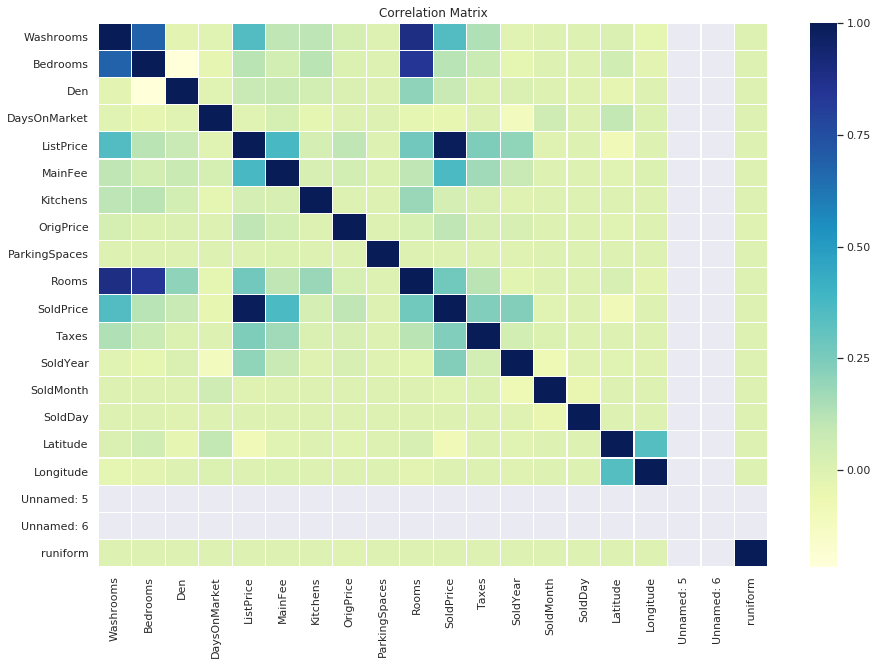

In [0]:
#Correlation between the variables
corrmatrix = re_final_data.corr()

f, ax = plt.subplots(figsize =(15, 10)) 
sns.heatmap(corrmatrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
plt.title('Correlation Matrix', fontsize = 12)
plt.show()

The variables highly correlated have dark blue and less correlated are a lighter green.

***Using correlation matrix to determine relationships around SoldPrice***

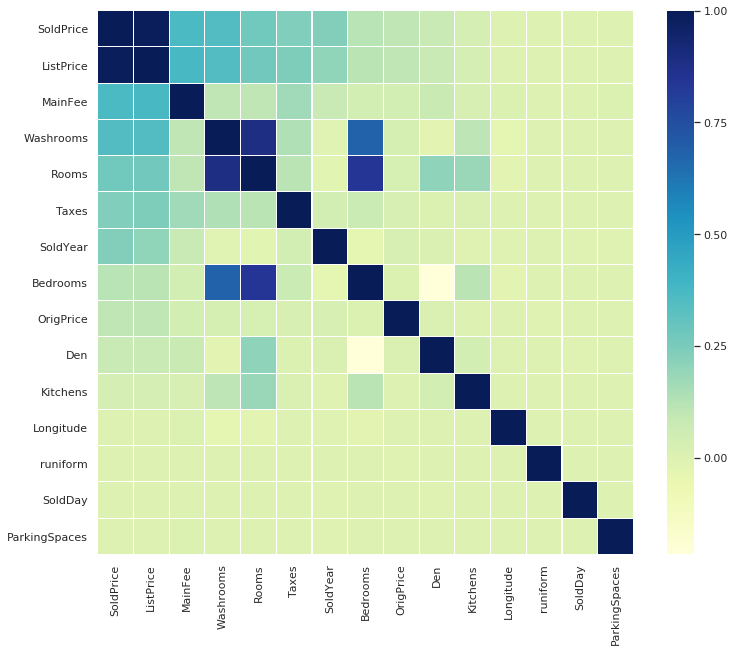

In [0]:
# SoldPrice correlation matrix 
# k : number of variables for heatmap 
k = 15
cols = corrmatrix.nlargest(k, 'SoldPrice')['SoldPrice'].index 
  
cm = np.corrcoef(re_final_data[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 

***Scatter plots for relationship between SoldPrice, Rooms, Washrooms and Bedrooms***


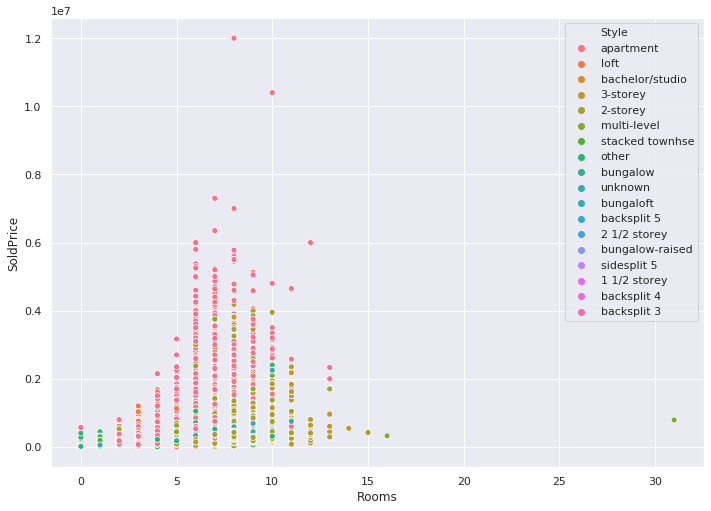

In [0]:
#Scatter plot for Rooms and Bedrooms
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.scatterplot(re_final_data['Rooms'], re_final_data['SoldPrice'], hue = re_final_data['Style'])

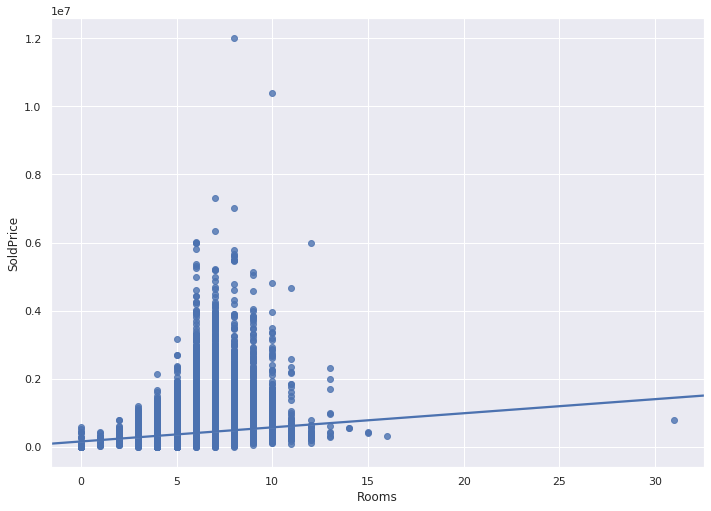

In [0]:
# Determining the regression line in the plot
sns.regplot(re_final_data.Rooms, re_final_data.SoldPrice)

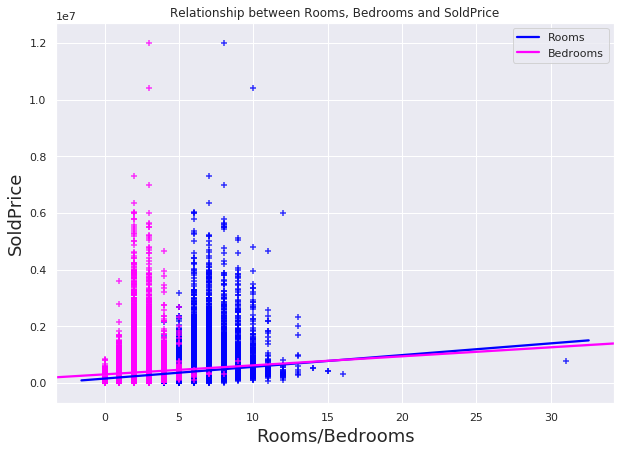

In [0]:
# Regression plot using seaborn.
fig = plt.figure(figsize=(10,7))
sns.regplot(x=re_final_data.Rooms,y=re_final_data.SoldPrice,color='blue', marker='+')
sns.regplot(x=re_final_data.Bedrooms,y=re_final_data.SoldPrice,color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Rooms','Bedrooms'])
plt.title('Relationship between Rooms, Bedrooms and SoldPrice', size=12)
plt.xlabel('Rooms/Bedrooms', size=18)
plt.ylabel('SoldPrice', size=18);

***Ploting a Univariate Histogram***

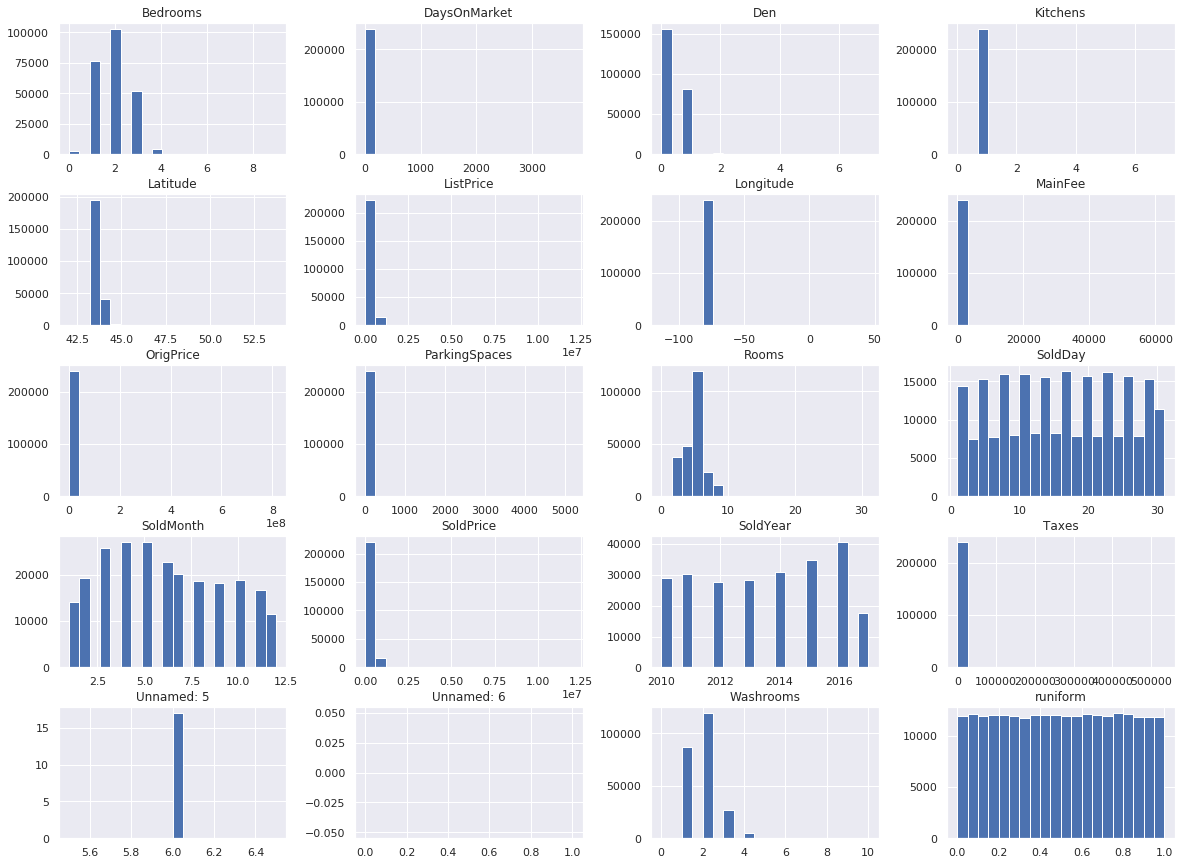

In [0]:
#Univariate Histogram
re_final_data.hist(bins=20, figsize = (20, 15))
plt.show()

**Regression Models**

In [0]:
# Packages needed for the model

from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification

In [0]:
# Splitting Dataset into train and test for models training.

np.random.seed(1234)
re_final_data['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(re_final_data))
#coaches['runiform']
final_data_train = re_final_data[re_final_data['runiform'] >= 0.33]
final_data_test = re_final_data[re_final_data['runiform'] < 0.33]
#print(final_data_train)
#print(final_data_test)
print(final_data_train.shape)
print(final_data_test.shape)

(160448, 47)
(78968, 47)


***Building a first model with Rooms to determine SoldPrice***


In [0]:
#Building a simple model with Rooms to determine if it is a function of SoldPrice
Model_One = str('SoldPrice ~ Rooms')

# fit the model to the training set
train_model_fit = smf.ols(Model_One, data = final_data_train).fit()

# summary of model fit to the training set
print(train_model_fit.summary())

# training set predictions from the model fit to the training set
final_data_train['predict_SalesPrice'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
final_data_test['predict_SalesPrice'] = train_model_fit.predict(final_data_test)

#final_data_train #run for predicted salaries
#final_data_test

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                 1.303e+04
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:38:23   Log-Likelihood:            -2.1943e+06
No. Observations:              160448   AIC:                         4.389e+06
Df Residuals:                  160446   BIC:                         4.389e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.588e+05   1906.907     83.286      0.0

This model even though small p-values, the R-sqaured of 0.075 indicating the proportion of the variance for the dependent variable(SOLDPRICE) that's explained by the independent variable.

***Building a second model with Rooms and Washrooms to determine if it is a function of SoldPrice***

In [0]:
#Building second model with Rooms and Washrooms to determine if it is a function of SoldPrice
Model_Two = str('SoldPrice ~ Rooms + Washrooms')


# fit the model to the training set
train_model_fit = smf.ols(Model_Two, data = final_data_train).fit()

# summary of model fit to the training set
print(train_model_fit.summary())

# training set predictions from the model fit to the training set
final_data_train['predict_SalesPrice'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
final_data_test['predict_SalesPrice'] = train_model_fit.predict(final_data_test)

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                 1.229e+04
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:38:23   Log-Likelihood:            -2.1892e+06
No. Observations:              160448   AIC:                         4.378e+06
Df Residuals:                  160445   BIC:                         4.378e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.326e+05   1979.581    117.502      0.0

This model even though small p-values, the R-sqaured of 0.133(which is low) indicating the proportion of the variance for the dependent variable(SOLDPRICE) that's explained by the independent variables.

***Building a third model with Rooms, Washrooms, Bedrooms to determine if it is a function of SoldPrice***

In [0]:
#Building a third model with Rooms, Washrooms, Bedrooms to determine if it is a function of SoldPrice
Model_Three = str('SoldPrice ~ Rooms + Washrooms + Bedrooms')


# fit the model to the training set
train_model_fit = smf.ols(Model_Three, data = final_data_train).fit()

# summary of model fit to the training set
print(train_model_fit.summary())

# training set predictions from the model fit to the training set
final_data_train['predict_SalesPrice'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
final_data_test['predict_SalesPrice'] = train_model_fit.predict(final_data_test)

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     9921.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:38:23   Log-Likelihood:            -2.1869e+06
No. Observations:              160448   AIC:                         4.374e+06
Df Residuals:                  160444   BIC:                         4.374e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.843e+05   2080.986     88.584      0.0

This model even though small p-values, the R-sqaured of 0.156 (which is low) indicating the proportion of the variance for the dependent variable(SOLDPRICE) that's explained by the independent variables.

***Building a fourth model with ListPrice to determine if it is a function of SoldPrice***

In [0]:
#Building a fourth model with ListPrice to determine if it is a function of SoldPrice
Model_Four = str('SoldPrice ~ ListPrice')

# fit the model to the training set
train_model_fit = smf.ols(Model_Four, data = final_data_train).fit()

# summary of model fit to the training set
print(train_model_fit.summary())

# training set predictions from the model fit to the training set
final_data_train['predict_SalesPrice'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
final_data_test['predict_SalesPrice'] = train_model_fit.predict(final_data_test)

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.033e+07
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:38:23   Log-Likelihood:            -1.8652e+06
No. Observations:              160448   AIC:                         3.730e+06
Df Residuals:                  160446   BIC:                         3.731e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4614.3234    131.732     35.028      0.0

This model even though small p-values, the R-sqaured of 0.985 (which is high and possibly a good model) indicating the proportion of the variance for the dependent variable(SOLDPRICE) that's explained by the independent variables.

***Building a Fifth model with Rooms, Rooms, Bedrooms and ListPrice to determine if it is a function of SoldPrice***

In [0]:
#Building a Fifth model with Rooms, Rooms, Bedrooms and ListPrice to determine if it is a function of SoldPrice
Model_Five = str('SoldPrice ~ Rooms + Washrooms + Bedrooms + ListPrice')


# fit the model to the training set
train_model_fit = smf.ols(Model_Five, data = final_data_train).fit()

# summary of model fit to the training set
print(train_model_fit.summary())

# training set predictions from the model fit to the training set
final_data_train['predict_SalesPrice'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
final_data_test['predict_SalesPrice'] = train_model_fit.predict(final_data_test)

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 2.588e+06
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:38:23   Log-Likelihood:            -1.8651e+06
No. Observations:              160448   AIC:                         3.730e+06
Df Residuals:                  160443   BIC:                         3.730e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1341.9550    286.684      4.681      0.0

***Building a sixth model with Rooms, Bedrooms, ListPrice to determine if it is a function of SoldPrice***

In [0]:
#Building a sixth model with Rooms, Bedrooms, ListPrice to determine if it is a function of SoldPrice
Model_Six = str('SoldPrice ~ Rooms + Bedrooms + ListPrice')


# fit the model to the training set
train_model_fit = smf.ols(Model_Six, data = final_data_train).fit()

# summary of model fit to the training set
print(train_model_fit.summary())

# training set predictions from the model fit to the training set
final_data_train['predict_SalesPrice'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
final_data_test['predict_SalesPrice'] = train_model_fit.predict(final_data_test)

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 3.451e+06
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:38:24   Log-Likelihood:            -1.8651e+06
No. Observations:              160448   AIC:                         3.730e+06
Df Residuals:                  160444   BIC:                         3.730e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1124.0225    257.932      4.358      0.0

This is the best model since the p-values for the all the independenent variables are small and less than the alpha(0.05) and with a good R-squared of 98.5%. This is the good model as well

***Building a seventh model with Rooms, Bedroom, MainFee, Taxes, SoldYear to determine if it is a function of SoldPrice***

In [0]:
#Building a seventh model with Rooms, Bedroom, MainFee, Taxes, SoldYear to determine if it is a function of SoldPrice
Model_Seven = str('SoldPrice ~ Rooms + Bedrooms + MainFee + Taxes + SoldYear')


# fit the model to the training set
train_model_fit = smf.ols(Model_Seven, data = final_data_train).fit()

# summary of model fit to the training set
print(train_model_fit.summary())

# training set predictions from the model fit to the training set
final_data_train['predict_SalesPrice'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
final_data_test['predict_SalesPrice'] = train_model_fit.predict(final_data_test)

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                 1.438e+04
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:38:24   Log-Likelihood:            -2.1709e+06
No. Observations:              160448   AIC:                         4.342e+06
Df Residuals:                  160442   BIC:                         4.342e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.882e+07   4.17e+05    -93.167      0.0

**kNN Algorithm Model**

Using the previously cleaned data as previous models.

In [0]:
#Read in the clean file
path_F = "/content/drive/My Drive/IST718_Project/Data/RealAlyze_2010to2017_PostCleaning.csv"
RE_Final_S = pd.read_csv(path_F)

Viewing the data

In [0]:
RE_Final_S.head()
dataset = RE_Final_S
dataset.head()

,AirCond,Address,CompUnitNo,Area,Washrooms,Bedrooms,Den,SoldDate,Exposure,Province,Dir_CrossStreets,DaysOnMarket,HeatSource,ListingEntryDate,LaundryLevel,ListPrice,LastStatus,MainFee,MLNum,Kitchens,OrigPrice,ParkingType,ParkingSpaces,Balcony,Rooms,Sale/Lease,SoldPrice,SqFootage,FloorNo,Style,Taxes,ClosedDate,Type,WaterIncl,Age,PostalCode,SoldYear,SoldMonth,SoldDay
0,central air,600fleetst,504,toronto,1.0,1.0,1.0,2010-01-06,e,ontario,lakeshorebathurstst,158.0,gas,8/1/2009 0:00,unknown,319000.0,sld,320.46,c1677165,1.0,299000.0,none,0.0,open,4.0,sale,290000.0,500-699,5,apartment,0.0,2010-02-01 00:00:00,condo apartment,y,zero to five,m5v1b7,2010,1,6
1,central air,65harboursq,ph7,toronto,4.0,5.0,0.0,2010-01-15,e,ontario,bayqueensquay,155.0,electric,8/13/2009 0:00,upper,1449000.0,sld,1780.00,c1684466,1.0,1499999.0,exclusive,2.0,open,10.0,sale,1395000.0,3500-5000,38,3-storey,10500.0,2010-03-01 00:00:00,condo apartment,y,unknown,m5j2l4,2010,1,15
2,central air,16yongest,ph7,toronto,3.0,3.0,0.0,2010-01-14,sw,ontario,yongelakeshore,119.0,gas,9/18/2009 0:00,unknown,799900.0,sld,0.00,c1706859,1.0,799900.0,none,0.0,open,7.0,sale,807400.0,1300-1499,40,apartment,0.0,2010-03-31 00:00:00,condo apartment,y,new,m5e1r4,2010,1,14
3,central air,18harbourst,1602,toronto,2.0,2.0,1.0,2010-01-27,nw,ontario,yongelakeshore,117.0,gas,10/2/2009 0:00,unknown,497000.0,sld,440.63,c1715732,1.0,497000.0,owned,1.0,open,6.0,sale,492000.0,900-1099,16,apartment,0.0,2010-04-01 00:00:00,condo apartment,y,new,m5j2z6,2010,1,27
4,unknown,1338yorkmillsrd,1601,toronto,2.0,3.0,0.0,2010-01-31,se,ontario,vicpark401,115.0,gas,10/8/2009 0:00,main,220000.0,sld,613.84,c1720379,1.0,220000.0,owned,1.0,open,6.0,sale,210000.0,unknown,15,apartment,1620.0,2010-03-26 00:00:00,condo apartment,y,unknown,m3a3m3,2010,1,31


While the data has already been "cleaned" here we're breaking it up into train and test sets -- 80/20.

In [0]:
X = dataset[['DaysOnMarket','ListPrice','Washrooms','Bedrooms','Den','Kitchens','Taxes','SoldDay']].values
y = dataset[['Type']].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Setting up the kNN model

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=10000)
classifier.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=10000, n_neighbors=5, p=2,
                     weights='uniform')

Running the model against the test set.

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   15     0     0   166     9     0     0     0     0     0     0     0
      0]
 [    5     2     0   110     4     0     0     0     0     0     0     0
      0]
 [    0     1     1   610    77     0     0     0     0     4     0     0
      0]
 [   15    11    30 33428  1847     3     1     0     2    12     0     0
      0]
 [    4     2     8  2955  8392    10     0     0     0     0     6     0
      0]
 [    0     0     0    50    67    25     0     0     0     0    10     0
      0]
 [    0     0     0    29     1     0     0     0     0     0     0     0
      0]
 [    0     0     0     1     0     0     0     0     1     2     0     0
      0]
 [    0     0     1    31     2     0     0     1     3     9     0     0
      0]
 [    0     0     0    12     0     0     0     2    11    24     0     0
      0]
 [    0     0     0    30    77     8     0     0     0     0     4     0
      0]
 [    0     0     0     1     0     0     0     0     0     0     0     0
      0]
 [  

Predicting against the test set.

Calculating error

In [0]:
# from multiprocessing import Pool, cpu_count
error = []
kvar = 10
# Calculating error for K values between 1 and 20
for i in range(1, kvar):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=10000)
    knn.fit(X_train, y_train.ravel())
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Plotting the results.

Text(0, 0.5, 'Mean Error')

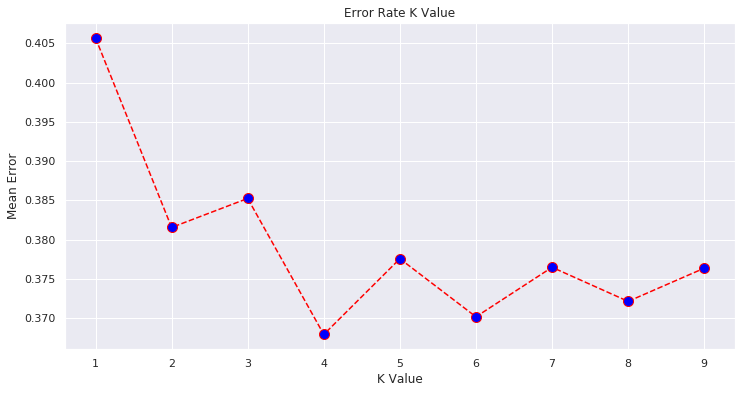

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, kvar), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In Conclusion, the kNN model is an unsupervised learning classifier.  The best use for this model in the context of our real estate project might be to develop a "comp" list for specific home listings.  

The overall accuracy of this model was 87% -- not very good.  The accuracy would likely improve if we used specific variables targeted at "comps" and additional "accurized" data such as the actual square footage as a metric variable instead of a range of square footage as a categorical value.  Collecting variables which were common to all of the listings (both the target and the "comps").

### **Conclusion**

The models explored and corresponding accuracy rates are outline below.


Keras - 87% - Without more specific data as part of the data points (e.g., year home was built and exact square footage),  predicting housing prices is difficult using a deep learning model like Keras

Regression - 98% R-square with Rooms, Bedrooms and List Price have small p-value. Model Six is the best model since the p-values of the independent variables are small and with an R-sqaured of 0.985 (which is high) indicating the proportion of the variance for the dependent variable(SOLDPRICE) that's explained by the independent variables. 

ARIMA - Without significantly more data points, forecasting home values using a time series model creates a wide range and significant errors

kNN - 87% - kNN did not generate sufficient accuracy to predict home prices reliably and performance was less than desirable


Overall, Regression and Keras model would be the best choice for this problem using the data in its current state.  In order to increase accuracy using the models, more refined data is needed.  Specifically the 'notes' feature from the original dataset contains specifc metric values of square footage and other qualitative elements which may benefit our modeling.  Text Mining has to be used to mine and get information from this field which has the exact square footage of a unit\house.  Sentiment analysis may be used to deterimine specifc language used by realtors to market homes.  More specific spatial data and metrics such as priximity to public transportation, shopping and medical facilities may increase the accuracy of our outcomes..  This geospatial data may be obtained by geocoding the addresses into XY coordinates and identifying the proximity to the aforementioned services.  This is a similar albeit simpler version of Risk Terrain Modeling for Crime Analysis. 

Additional analysis which may support our modeling efforts is the historical pricing of a unit over the past 15 years and the current market scenario which significantly impacts market values.  

With the addition of these added elements, we believe this model will accurately predict and potentially classify values for homes in the Toronto area.  This informaiton can then be used by realtors as a substitute over "comps" to price homes, or as a means for identifying realistic sales within a timeframe and listing price.